# LinkedIn Content EDA

This notebook helps you explore and analyze your LinkedIn analytics data (XLSX) and LLM-classified post data (JSONL).

---

In [2]:
# Setup
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

## 1. Load LinkedIn Analytics XLSX

Edit the path below if your file name changes.

In [5]:
import os
print(os.getcwd())

# Path to analytics file
analytics_path = Path('../../backend/data/Content_2024-06-30_2025-06-29_DavidStepania.xlsx')

print(analytics_path.resolve())

# Try to load the first sheet
df_analytics = pd.read_excel(analytics_path, sheet_name=0)
print('Analytics shape:', df_analytics.shape)
df_analytics.head()

/Users/edgar/workspace/chrome-lab/prisma/analysis/notebooks
/Users/edgar/workspace/chrome-lab/prisma/backend/data/Content_2024-06-30_2025-06-29_DavidStepania.xlsx
Analytics shape: (2, 2)


/Users/edgar/workspace/chrome-lab/prisma/analysis/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Overall Performance,6/30/2024 - 6/29/2025
0,Impressions,7126325
1,Members reached,0


## 2. Load LLM-Classified Posts (JSONL)

Each line is a JSON object with classification results.

In [6]:
classified_path = Path('../../backend/data/classified_posts.jsonl')

posts = []
with open(classified_path, 'r') as f:
    for line in f:
        try:
            posts.append(json.loads(line))
        except Exception as e:
            print('Error parsing line:', e)

df_classified = pd.json_normalize(posts)
print('Classified posts shape:', df_classified.shape)
df_classified.head()

Classified posts shape: (9, 13)


,timestamp,url,data.postText,data.reactions.total,data.reactions.types,data.reactions.commentsCount,data.comments,classification.Format,classification.Text Tone,classification.Topic,classification.Sentiment,classification.Narrative Type,classification.Content Framework
0,2025-07-17T11:57:07.015045,https://www.linkedin.com/feed/update/urn:li:ac...,Spotify's HR chief says remote staff aren't 'c...,2826,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'PR...",113,"[{'author': 'David Stepania', 'text': 'Good mo...",Text with image,Professional,Remote Work,Positive,Educational,Hook–Problem–Solution
1,2025-07-17T11:57:40.856341,https://www.linkedin.com/feed/update/urn:li:ac...,Elon Musk calls BS on the $500B AI investment ...,2021,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'IN...",846,"[{'author': 'David Stepania', 'text': 'Looks l...",Text with image,Casual,Tech Trends,Challenging,Educational,Rant–Resolve
2,2025-07-17T11:58:14.825619,https://www.linkedin.com/feed/update/urn:li:ac...,Stanford just dropped a bomb: 9.5% of engineer...,1088,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'IN...",781,"[{'author': 'David Stepania', 'text': 'Yegor D...",Text with image,Critical,Workplace Efficiency,Challenging,Exposé,Hook–Problem–Solution
3,2025-07-17T11:58:49.493447,https://www.linkedin.com/feed/update/urn:li:ac...,Having talked with a few dozen tech founders &...,716,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'IN...",770,"[{'author': 'David Stepania', 'text': 'Join 10...",Text-only,Professional,Tech Trends,Challenging,Educational,Hook–Problem–Solution
4,2025-07-17T11:59:23.006300,https://www.linkedin.com/feed/update/urn:li:ac...,Cursor just surpassed 100m in revenue \n\nFAAN...,850,"[{'type': 'ENTERTAINMENT', 'alt': 'funny'}, {'...",134,"[{'author': 'Ben Syverson', 'text': 'Eh, that'...",Text-only,Challenging,Tech Trends,Challenging,Predictive,Rant–Resolve


## 3. Explore and Merge Data

- Preview columns and data types
- Look for possible join keys (e.g., post URL, date)
- Merge if possible, or analyze separately


In [7]:
print('Analytics columns:', df_analytics.columns.tolist())
print('Classified columns:', df_classified.columns.tolist())

Analytics columns: ['Overall Performance', '6/30/2024 - 6/29/2025']
Classified columns: ['timestamp', 'url', 'data.postText', 'data.reactions.total', 'data.reactions.types', 'data.reactions.commentsCount', 'data.comments', 'classification.Format', 'classification.Text Tone', 'classification.Topic', 'classification.Sentiment', 'classification.Narrative Type', 'classification.Content Framework']


### (Optional) Merge Example

If you find a common key (e.g., post URL or date), you can merge the dataframes.

```python
# Example: merge on URL if available
# merged = pd.merge(df_analytics, df_classified, left_on='Post URL', right_on='url', how='inner')
# merged.head()
```


## 4. Basic Visualizations

- Engagement over time
- Impressions vs. LLM categories
- Top performing post types


In [ ]:
# Example: Plot engagement over time (customize column names as needed)
if 'Date' in df_analytics.columns and 'Engagements' in df_analytics.columns:
    df_analytics['Date'] = pd.to_datetime(df_analytics['Date'])
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_analytics, x='Date', y='Engagements')
    plt.title('Engagements Over Time')
    plt.show()
else:
    print('Customize this cell with your actual date and engagement columns.')

## 5. Next Steps

- Explore correlations between LLM classifications and post performance
- Identify patterns in top performing posts
- Try grouping by LLM categories (e.g., sentiment, topic) and compare metrics
- Visualize distributions and outliers

---
**Tip:** Add your own cells and notes as you discover insights!

In [8]:
  import pandas as pd
  analytics_path = Path('../../backend/data/Content_2024-06-30_2025-06-29_DavidStepania.xlsx')
  print(pd.ExcelFile(analytics_path).sheet_names)


['DISCOVERY', 'ENGAGEMENT', 'TOP POSTS', 'FOLLOWERS', 'DEMOGRAPHICS']


/Users/edgar/workspace/chrome-lab/prisma/analysis/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [11]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

for sheet in ['ENGAGEMENT', 'TOP POSTS']:
    df = pd.read_excel(analytics_path, sheet_name=sheet)
    print(f"Sheet: {sheet}")
    print(df.head())
    print(df.columns.tolist())
    print('-' * 40)

Sheet: ENGAGEMENT
        Date  Impressions  Engagements
0  6/30/2024          281            6
1   7/1/2024          303            3
2   7/2/2024          198            0
3   7/3/2024         1367           46
4   7/4/2024         1398           14
['Date', 'Impressions', 'Engagements']
----------------------------------------
Sheet: TOP POSTS
  Maximum of 50 posts available to include in this list         Unnamed: 1   Unnamed: 2  Unnamed: 3  \
0                                                NaN                   NaN          NaN         NaN   
1                                           Post URL     Post publish date  Engagements         NaN   
2  https://www.linkedin.com/feed/update/urn:li:ac...              1/5/2025         5582         NaN   
3  https://www.linkedin.com/feed/update/urn:li:ac...            10/11/2024         2971         NaN   
4  https://www.linkedin.com/feed/update/urn:li:ac...             1/22/2025         2956         NaN   

                                

In [12]:
df_top_posts = pd.read_excel(
    analytics_path,
    sheet_name='TOP POSTS',
    header=2  # Use the third row (index 2) as the header
)
print(df_top_posts.head())
print(df_top_posts.columns.tolist())


                                            Post URL Post publish date  Engagements  Unnamed: 3  \
0  https://www.linkedin.com/feed/update/urn:li:ac...          1/5/2025         5582         NaN   
1  https://www.linkedin.com/feed/update/urn:li:ac...        10/11/2024         2971         NaN   
2  https://www.linkedin.com/feed/update/urn:li:ac...         1/22/2025         2956         NaN   
3  https://www.linkedin.com/feed/update/urn:li:ac...        12/18/2024         1928         NaN   
4  https://www.linkedin.com/feed/update/urn:li:ac...        12/26/2024         1520         NaN   

                                          Post URL.1 Post publish date.1  Impressions  
0  https://www.linkedin.com/feed/update/urn:li:ac...            1/5/2025      1456484  
1  https://www.linkedin.com/feed/update/urn:li:ac...           1/22/2025      1158987  
2  https://www.linkedin.com/feed/update/urn:li:ac...          12/26/2024       686198  
3  https://www.linkedin.com/feed/update/urn:li:ac... 

In [13]:
# Load and clean TOP POSTS
df_top_posts = pd.read_excel(analytics_path, sheet_name='TOP POSTS', header=2)
df_top_posts = df_top_posts.rename(columns=lambda x: x.strip() if isinstance(x, str) else x)
df_top_posts = df_top_posts.loc[:, ~df_top_posts.columns.duplicated()]  # Remove duplicate columns

# Drop rows where Post URL is NaN
df_top_posts = df_top_posts[df_top_posts['Post URL'].notna()]

# Merge with classified data
merged = pd.merge(df_top_posts, df_classified, left_on='Post URL', right_on='url', how='inner')
print(merged.head())
print(merged.columns.tolist())


Empty DataFrame
Columns: [Post URL, Post publish date, Engagements, Unnamed: 3, Post URL.1, Post publish date.1, Impressions, timestamp, url, data.postText, data.reactions.total, data.reactions.types, data.reactions.commentsCount, data.comments, classification.Format, classification.Text Tone, classification.Topic, classification.Sentiment, classification.Narrative Type, classification.Content Framework]
Index: []
['Post URL', 'Post publish date', 'Engagements', 'Unnamed: 3', 'Post URL.1', 'Post publish date.1', 'Impressions', 'timestamp', 'url', 'data.postText', 'data.reactions.total', 'data.reactions.types', 'data.reactions.commentsCount', 'data.comments', 'classification.Format', 'classification.Text Tone', 'classification.Topic', 'classification.Sentiment', 'classification.Narrative Type', 'classification.Content Framework']


In [14]:
# Keep only the first set of columns and Impressions
df_top_posts_clean = df_top_posts[['Post URL', 'Post publish date', 'Engagements', 'Impressions']].copy()
df_top_posts_clean = df_top_posts_clean.rename(columns={
    'Post URL': 'url',
    'Post publish date': 'publish_date',
    'Engagements': 'engagements',
    'Impressions': 'impressions'
})
# Convert numeric columns to int
df_top_posts_clean['engagements'] = pd.to_numeric(df_top_posts_clean['engagements'], errors='coerce')
df_top_posts_clean['impressions'] = pd.to_numeric(df_top_posts_clean['impressions'], errors='coerce')
print(df_top_posts_clean.head())

                                                 url publish_date  engagements  impressions
0  https://www.linkedin.com/feed/update/urn:li:ac...     1/5/2025         5582      1456484
1  https://www.linkedin.com/feed/update/urn:li:ac...   10/11/2024         2971      1158987
2  https://www.linkedin.com/feed/update/urn:li:ac...    1/22/2025         2956       686198
3  https://www.linkedin.com/feed/update/urn:li:ac...   12/18/2024         1928       467258
4  https://www.linkedin.com/feed/update/urn:li:ac...   12/26/2024         1520       464272


In [15]:
# Merge on 'url'
merged = pd.merge(df_top_posts_clean, df_classified, on='url', how='inner')
print(merged.head())
print(merged.columns.tolist())

Empty DataFrame
Columns: [url, publish_date, engagements, impressions, timestamp, data.postText, data.reactions.total, data.reactions.types, data.reactions.commentsCount, data.comments, classification.Format, classification.Text Tone, classification.Topic, classification.Sentiment, classification.Narrative Type, classification.Content Framework]
Index: []
['url', 'publish_date', 'engagements', 'impressions', 'timestamp', 'data.postText', 'data.reactions.total', 'data.reactions.types', 'data.reactions.commentsCount', 'data.comments', 'classification.Format', 'classification.Text Tone', 'classification.Topic', 'classification.Sentiment', 'classification.Narrative Type', 'classification.Content Framework']


In [16]:
merged.groupby('classification.Format')['engagements'].mean().sort_values(ascending=False)

Series([], Name: engagements, dtype: float64)

In [17]:
merged.groupby('classification.Sentiment')['impressions'].mean().sort_values(ascending=False)

Series([], Name: impressions, dtype: float64)

In [18]:
print("Top posts URLs sample:")
print(df_top_posts_clean['url'].head(10).tolist())

print("\nClassified URLs sample:")
print(df_classified['url'].head(10).tolist())

Top posts URLs sample:
['https://www.linkedin.com/feed/update/urn:li:activity:7281708332724199424', 'https://www.linkedin.com/feed/update/urn:li:activity:7250517805018558464', 'https://www.linkedin.com/feed/update/urn:li:activity:7287848700305977344', 'https://www.linkedin.com/feed/update/urn:li:activity:7275160079954296833', 'https://www.linkedin.com/feed/update/urn:li:activity:7278084733060661250', 'https://www.linkedin.com/feed/update/urn:li:activity:7294050711208632323', 'https://www.linkedin.com/feed/update/urn:li:activity:7277022818385440768', 'https://www.linkedin.com/feed/update/urn:li:activity:7285298287073533952', 'https://www.linkedin.com/feed/update/urn:li:activity:7282061077079617536', 'https://www.linkedin.com/feed/update/urn:li:activity:7297973829409153025']

Classified URLs sample:
['https://www.linkedin.com/feed/update/urn:li:activity:7250517805018558464/', 'https://www.linkedin.com/feed/update/urn:li:activity:7287848700305977344/', 'https://www.linkedin.com/feed/updat

In [19]:
df_top_posts_clean['url'] = df_top_posts_clean['url'].str.strip()
df_classified['url'] = df_classified['url'].str.strip()

In [20]:
df_top_posts_clean['url'] = df_top_posts_clean['url'].str.lower()
df_classified['url'] = df_classified['url'].str.lower()

In [21]:
print("Top posts URLs sample:")
print(df_top_posts_clean['url'].head(10).tolist())

print("\nClassified URLs sample:")
print(df_classified['url'].head(10).tolist())

Top posts URLs sample:
['https://www.linkedin.com/feed/update/urn:li:activity:7281708332724199424', 'https://www.linkedin.com/feed/update/urn:li:activity:7250517805018558464', 'https://www.linkedin.com/feed/update/urn:li:activity:7287848700305977344', 'https://www.linkedin.com/feed/update/urn:li:activity:7275160079954296833', 'https://www.linkedin.com/feed/update/urn:li:activity:7278084733060661250', 'https://www.linkedin.com/feed/update/urn:li:activity:7294050711208632323', 'https://www.linkedin.com/feed/update/urn:li:activity:7277022818385440768', 'https://www.linkedin.com/feed/update/urn:li:activity:7285298287073533952', 'https://www.linkedin.com/feed/update/urn:li:activity:7282061077079617536', 'https://www.linkedin.com/feed/update/urn:li:activity:7297973829409153025']

Classified URLs sample:
['https://www.linkedin.com/feed/update/urn:li:activity:7250517805018558464/', 'https://www.linkedin.com/feed/update/urn:li:activity:7287848700305977344/', 'https://www.linkedin.com/feed/updat

In [22]:
# Remove trailing slashes from classified URLs
df_classified['url'] = df_classified['url'].str.rstrip('/')

# (Optional) Also strip spaces and lowercase for robustness
df_classified['url'] = df_classified['url'].str.strip().str.lower()
df_top_posts_clean['url'] = df_top_posts_clean['url'].str.strip().str.lower()

In [23]:
merged = pd.merge(df_top_posts_clean, df_classified, on='url', how='inner')
print(merged.head())
print(f"Merged rows: {len(merged)}")

                                                 url publish_date  engagements  impressions  \
0  https://www.linkedin.com/feed/update/urn:li:ac...   10/11/2024         2971      1158987   
1  https://www.linkedin.com/feed/update/urn:li:ac...    1/22/2025         2956       686198   
2  https://www.linkedin.com/feed/update/urn:li:ac...   12/18/2024         1928       467258   
3  https://www.linkedin.com/feed/update/urn:li:ac...   12/26/2024         1520       464272   
4  https://www.linkedin.com/feed/update/urn:li:ac...     2/8/2025          999       217815   

                    timestamp                                      data.postText  data.reactions.total  \
0  2025-07-17T11:57:07.015045  Spotify's HR chief says remote staff aren't 'c...                  2826   
1  2025-07-17T11:57:40.856341  Elon Musk calls BS on the $500B AI investment ...                  2021   
2  2025-07-17T11:58:14.825619  Stanford just dropped a bomb: 9.5% of engineer...                  1088   
3  20

In [24]:
print(merged.groupby('classification.Format')['engagements'].mean().sort_values(ascending=False))

classification.Format
Text with image    1707.000000
Text-only          1158.333333
Name: engagements, dtype: float64


In [25]:
print(merged.groupby('classification.Topic')['impressions'].mean().sort_values(ascending=False))
print(merged.groupby('classification.Sentiment')['impressions'].mean().sort_values(ascending=False))

classification.Topic
Remote Work             1158987.0
Workplace Efficiency     467258.0
Tech Trends              333698.0
Venture Capital          147941.0
Economic Policy          123297.0
Name: impressions, dtype: float64
classification.Sentiment
Positive       653464.000000
Challenging    348154.333333
Neutral        170119.000000
Name: impressions, dtype: float64


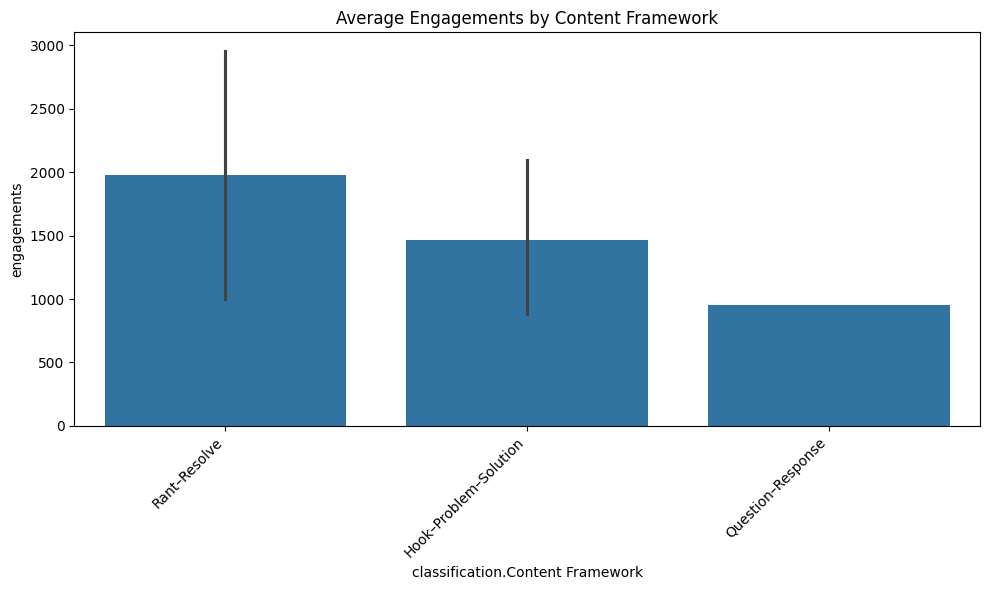

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    data=merged,
    x='classification.Content Framework',
    y='engagements',
    estimator='mean',
    order=merged.groupby('classification.Content Framework')['engagements'].mean().sort_values(ascending=False).index
)
plt.title('Average Engagements by Content Framework')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
print(
    merged.groupby(['classification.Format', 'classification.Topic'])[['engagements', 'impressions']].mean().sort_values('engagements', ascending=False)
)

                                            engagements   impressions
classification.Format classification.Topic                           
Text with image       Remote Work           2971.000000  1.158987e+06
                      Workplace Efficiency  1928.000000  4.672580e+05
                      Tech Trends           1871.500000  4.081420e+05
Text-only             Tech Trends           1158.333333  2.840687e+05
Text with image       Venture Capital        871.000000  1.479410e+05
                      Economic Policy        729.000000  1.232970e+05


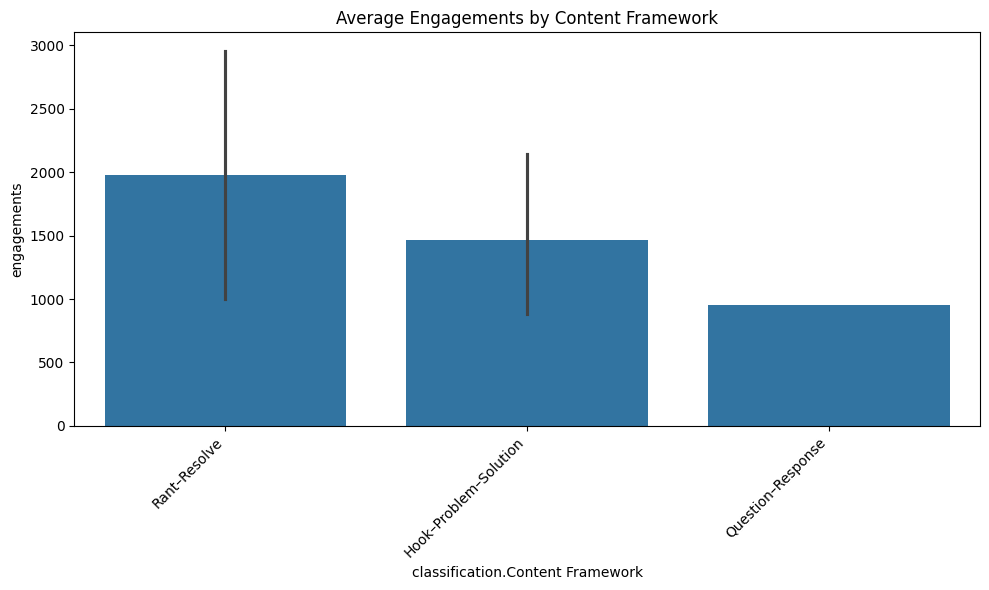

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=merged,
    x='classification.Content Framework',
    y='engagements',
    estimator='mean',
    order=merged.groupby('classification.Content Framework')['engagements'].mean().sort_values(ascending=False).index
)
plt.title('Average Engagements by Content Framework')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

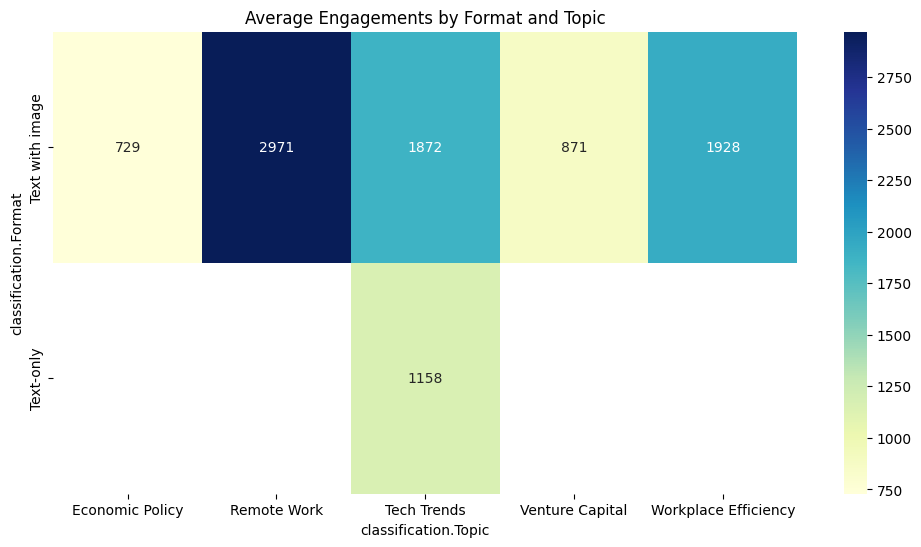

In [29]:
pivot = merged.pivot_table(
    index='classification.Format',
    columns='classification.Topic',
    values='engagements',
    aggfunc='mean'
)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Engagements by Format and Topic')
plt.show()

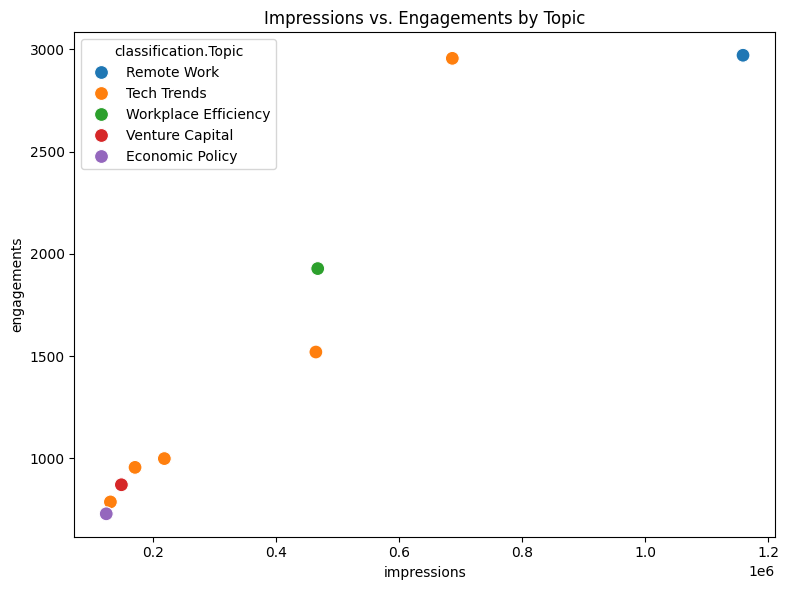

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=merged,
    x='impressions',
    y='engagements',
    hue='classification.Topic',
    s=100
)
plt.title('Impressions vs. Engagements by Topic')
plt.tight_layout()
plt.show()

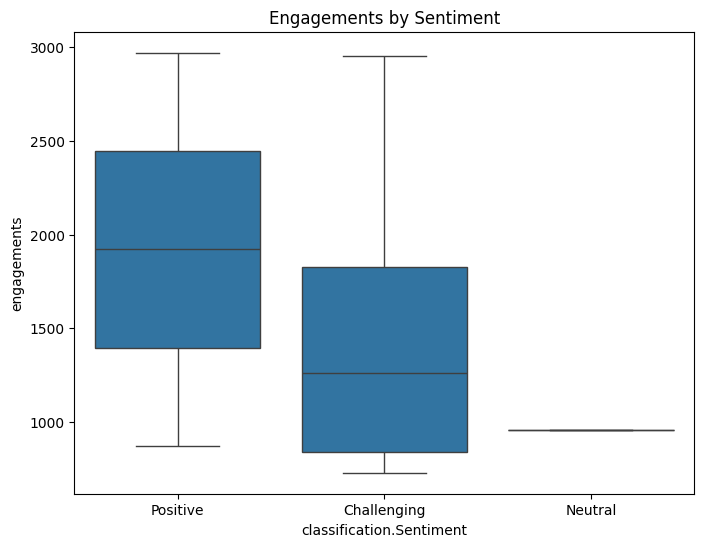

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=merged, x='classification.Sentiment', y='engagements')
plt.title('Engagements by Sentiment')
plt.show()

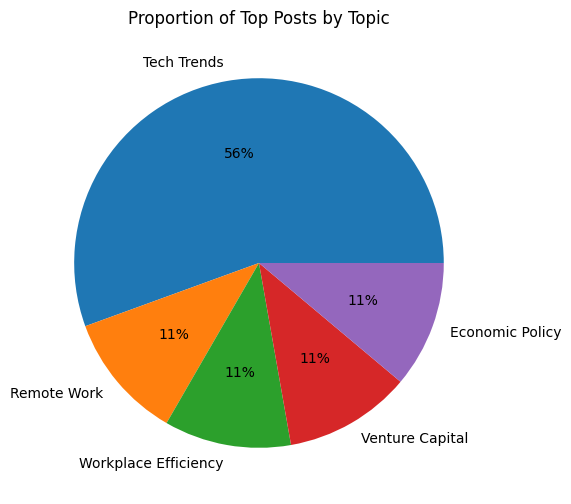

In [32]:
merged['classification.Topic'].value_counts().plot.pie(autopct='%1.0f%%', figsize=(6,6))
plt.title('Proportion of Top Posts by Topic')
plt.ylabel('')
plt.show()

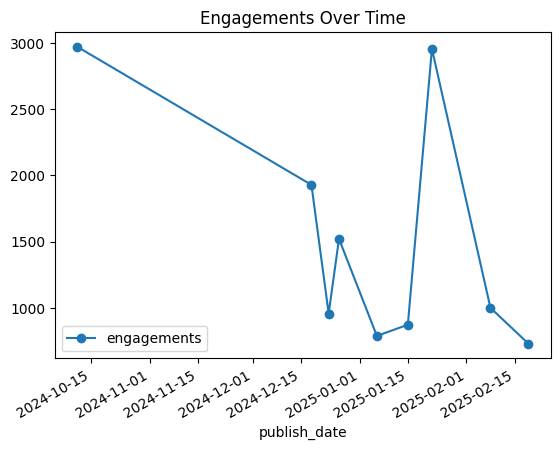

In [33]:
merged['publish_date'] = pd.to_datetime(merged['publish_date'])
merged.sort_values('publish_date').plot(x='publish_date', y='engagements', marker='o')
plt.title('Engagements Over Time')
plt.show()

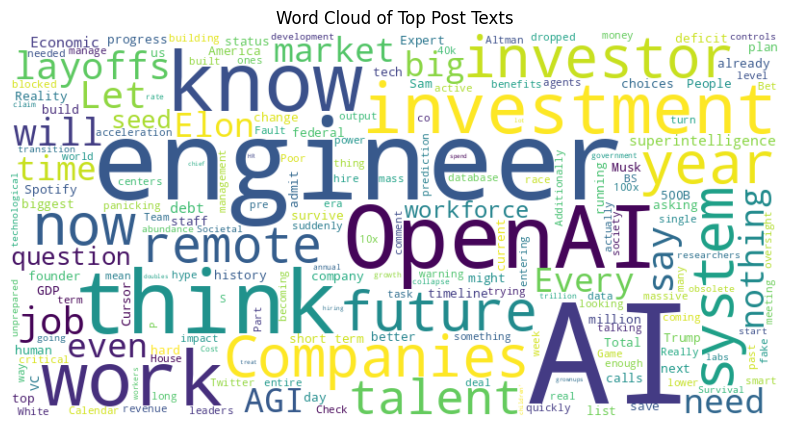

In [35]:
from wordcloud import WordCloud
text = ' '.join(merged['data.postText'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Post Texts')
plt.show()

In [40]:
import pandas as pd

analytics_path = Path('../../backend/data/Content_2024-06-30_2025-06-29_DavidStepania.xlsx')
xls = pd.ExcelFile(analytics_path)
print(xls.sheet_names)


# Preview ENGAGEMENT sheet
df_engagement_raw = pd.read_excel(analytics_path, sheet_name='ENGAGEMENT', header=None)
print(df_engagement_raw.head(10))

# Preview FOLLOWERS sheet
df_followers_raw = pd.read_excel(analytics_path, sheet_name='FOLLOWERS', header=None)
print(df_followers_raw.head(10))

['DISCOVERY', 'ENGAGEMENT', 'TOP POSTS', 'FOLLOWERS', 'DEMOGRAPHICS']
           0            1            2
0       Date  Impressions  Engagements
1  6/30/2024          281            6
2   7/1/2024          303            3
3   7/2/2024          198            0
4   7/3/2024         1367           46
5   7/4/2024         1398           14
6   7/5/2024          632            7
7   7/6/2024          590            8
8   7/7/2024          519            4
9   7/8/2024          874           11
                               0              1
0  Total followers on 6/29/2025:          25368
1                            NaN            NaN
2                           Date  New followers
3                      6/30/2024              6
4                       7/1/2024              5
5                       7/2/2024             11
6                       7/3/2024             11
7                       7/4/2024              9
8                       7/5/2024              8
9                    

In [42]:
df_engagement = pd.read_excel(analytics_path, sheet_name='ENGAGEMENT', header=0)
print(df_engagement.head())

df_followers = pd.read_excel(analytics_path, sheet_name='FOLLOWERS', header=2)
print(df_followers.head())

df_engagement['Date'] = pd.to_datetime(df_engagement['Date'])
df_followers['Date'] = pd.to_datetime(df_followers['Date'])

        Date  Impressions  Engagements
0  6/30/2024          281            6
1   7/1/2024          303            3
2   7/2/2024          198            0
3   7/3/2024         1367           46
4   7/4/2024         1398           14
        Date  New followers
0  6/30/2024              6
1   7/1/2024              5
2   7/2/2024             11
3   7/3/2024             11
4   7/4/2024              9


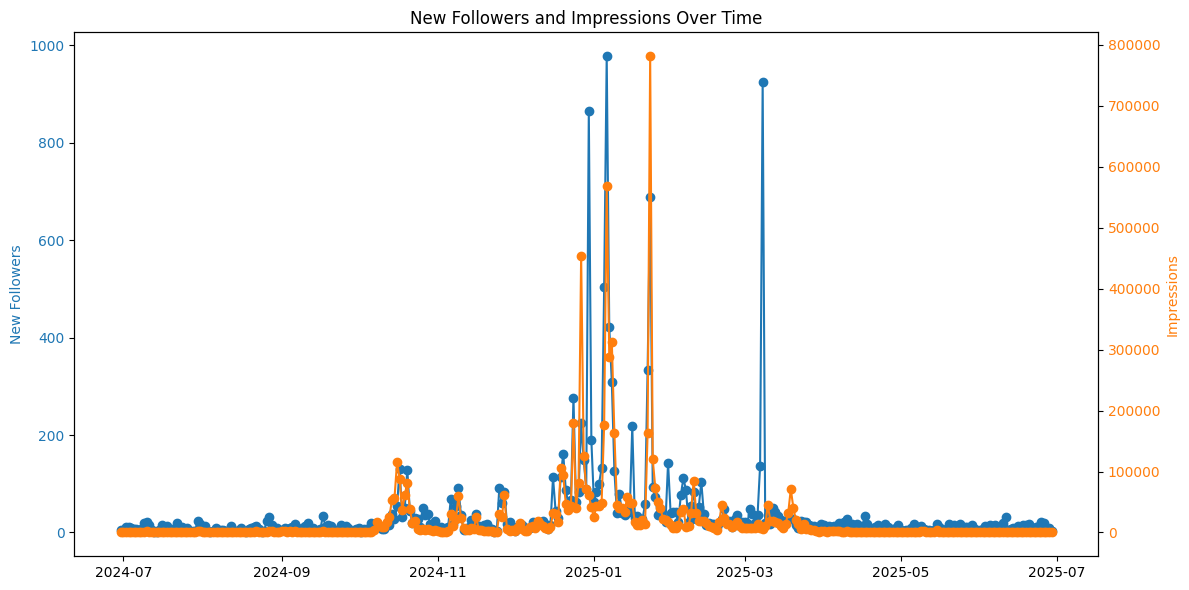

In [43]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot new followers
ax1.plot(df_followers['Date'], df_followers['New followers'], color='tab:blue', marker='o', label='New Followers')
ax1.set_ylabel('New Followers', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot impressions on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_engagement['Date'], df_engagement['Impressions'], color='tab:orange', marker='o', label='Impressions')
ax2.set_ylabel('Impressions', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('New Followers and Impressions Over Time')
fig.tight_layout()
plt.show()

In [44]:
# If not already done, ensure publish_date is datetime
merged['publish_date'] = pd.to_datetime(merged['publish_date'])
top_post_dates = merged['publish_date'].dropna().unique()

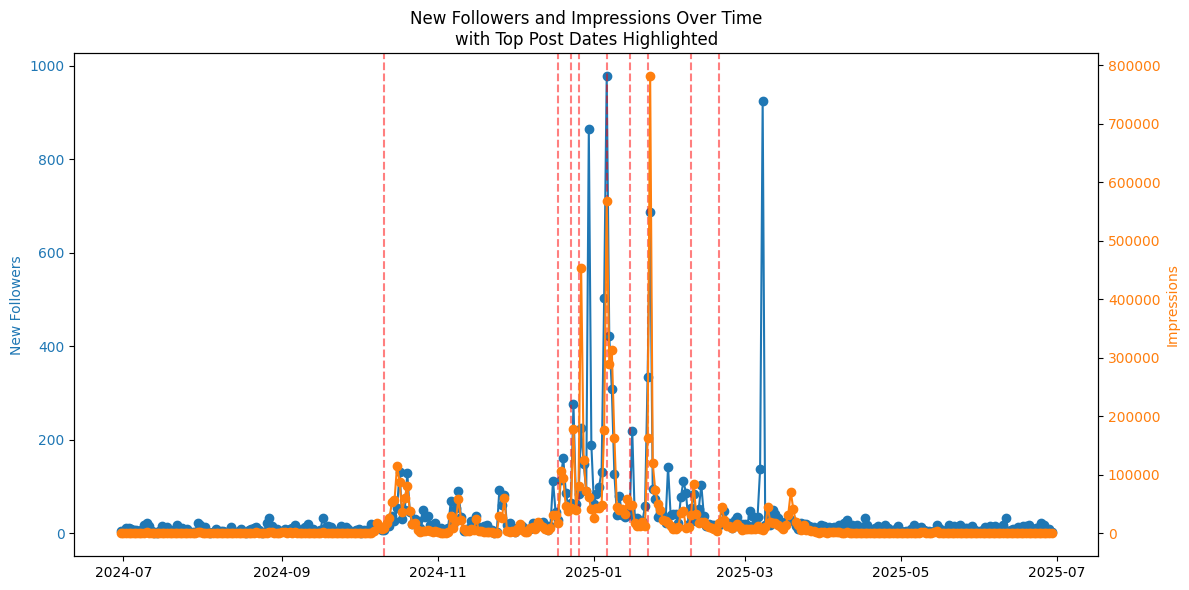

In [45]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot new followers
ax1.plot(df_followers['Date'], df_followers['New followers'], color='tab:blue', marker='o', label='New Followers')
ax1.set_ylabel('New Followers', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot impressions on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_engagement['Date'], df_engagement['Impressions'], color='tab:orange', marker='o', label='Impressions')
ax2.set_ylabel('Impressions', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Highlight top post dates
for date in top_post_dates:
    ax1.axvline(date, color='red', linestyle='--', alpha=0.5)

plt.title('New Followers and Impressions Over Time\nwith Top Post Dates Highlighted')
fig.tight_layout()
plt.show()

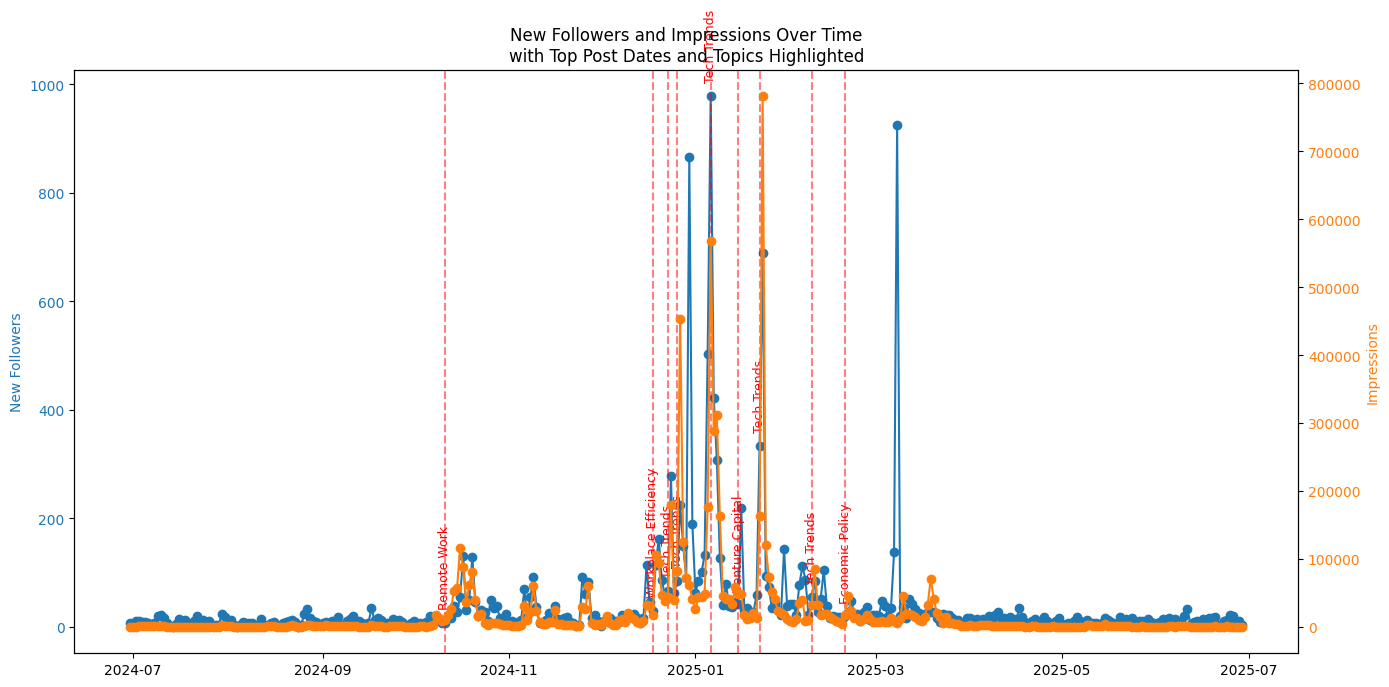

In [46]:
import matplotlib.pyplot as plt

# Ensure dates are datetime
df_followers['Date'] = pd.to_datetime(df_followers['Date'])
df_engagement['Date'] = pd.to_datetime(df_engagement['Date'])
merged['publish_date'] = pd.to_datetime(merged['publish_date'])

# Prepare top post dates and topics
top_post_dates = merged['publish_date'].dropna().unique()
top_post_info = merged.set_index('publish_date')['classification.Topic'].to_dict()

fig, ax1 = plt.subplots(figsize=(14,7))

# Plot new followers
ax1.plot(df_followers['Date'], df_followers['New followers'], color='tab:blue', marker='o', label='New Followers')
ax1.set_ylabel('New Followers', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot impressions on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_engagement['Date'], df_engagement['Impressions'], color='tab:orange', marker='o', label='Impressions')
ax2.set_ylabel('Impressions', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Highlight and annotate top post dates
for date in top_post_dates:
    ax1.axvline(date, color='red', linestyle='--', alpha=0.5)
    # Annotate with topic (or change to another field if you prefer)
    topic = top_post_info.get(date, "")
    # Find the y-value for annotation (followers on that date, or max if missing)
    y_val = df_followers.loc[df_followers['Date'] == date, 'New followers']
    y = y_val.values[0] if not y_val.empty else ax1.get_ylim()[1]
    ax1.annotate(
        topic,
        xy=(date, y),
        xytext=(0, 10),
        textcoords='offset points',
        rotation=90,
        color='red',
        fontsize=9,
        ha='center',
        va='bottom'
    )

plt.title('New Followers and Impressions Over Time\nwith Top Post Dates and Topics Highlighted')
fig.tight_layout()
plt.show()

In [47]:
# Merge on Date
df_daily = pd.merge(df_followers, df_engagement, on='Date', how='inner')
print(df_daily.head())

        Date  New followers  Impressions  Engagements
0 2024-06-30              6          281            6
1 2024-07-01              5          303            3
2 2024-07-02             11          198            0
3 2024-07-03             11         1367           46
4 2024-07-04              9         1398           14


In [48]:
# Compute correlation matrix
corr = df_daily[['New followers', 'Impressions', 'Engagements']].corr()
print(corr)

               New followers  Impressions  Engagements
New followers       1.000000     0.699532     0.750109
Impressions         0.699532     1.000000     0.899688
Engagements         0.750109     0.899688     1.000000


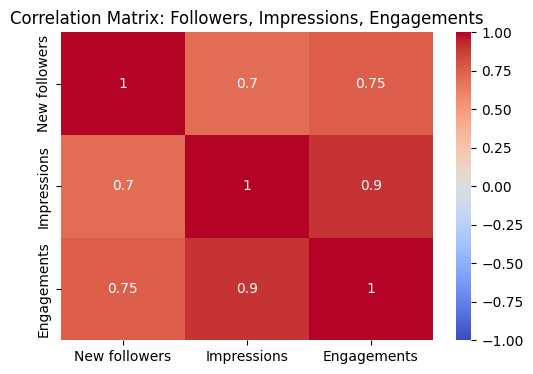

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Followers, Impressions, Engagements')
plt.show()

In [50]:
import pandas as pd

# Ensure dates are datetime
df_followers['Date'] = pd.to_datetime(df_followers['Date'])
merged['publish_date'] = pd.to_datetime(merged['publish_date'])

# Create a set of all days 1, 2, and 3 after each top post
after_top_post_dates = set()
for d in merged['publish_date']:
    for offset in range(1, 4):  # 1, 2, 3 days after
        after_top_post_dates.add(d + pd.Timedelta(days=offset))

# Mark days in df_followers that are after a top post
df_followers['after_top_post'] = df_followers['Date'].isin(after_top_post_dates)

In [51]:
print(df_followers.groupby('after_top_post')['New followers'].mean())

after_top_post
False     31.156805
True     132.555556
Name: New followers, dtype: float64


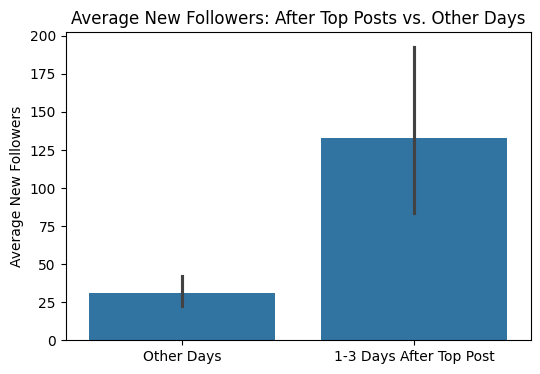

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(
    data=df_followers,
    x='after_top_post',
    y='New followers'
)
plt.xticks([0,1], ['Other Days', '1-3 Days After Top Post'])
plt.title('Average New Followers: After Top Posts vs. Other Days')
plt.ylabel('Average New Followers')
plt.xlabel('')
plt.show()

In [53]:
# For each top post, sum new followers on publish date and next 3 days
follower_gains = []
for i, row in merged.iterrows():
    post_date = row['publish_date']
    # Get new followers on publish date and next 3 days
    mask = (df_followers['Date'] >= post_date) & (df_followers['Date'] <= post_date + pd.Timedelta(days=3))
    total_new_followers = df_followers.loc[mask, 'New followers'].sum()
    follower_gains.append(total_new_followers)

# Add to merged DataFrame
merged['follower_gain_3d'] = follower_gains

In [54]:
topic_gain = merged.groupby('classification.Topic')['follower_gain_3d'].mean().sort_values(ascending=False)
print(topic_gain)

classification.Topic
Tech Trends             855.6
Workplace Efficiency    392.0
Venture Capital         323.0
Economic Policy         117.0
Remote Work              81.0
Name: follower_gain_3d, dtype: float64


In [55]:
format_gain = merged.groupby('classification.Format')['follower_gain_3d'].mean().sort_values(ascending=False)
print(format_gain)

classification.Format
Text with image    656.166667
Text-only          418.000000
Name: follower_gain_3d, dtype: float64


In [56]:
sentiment_gain = merged.groupby('classification.Sentiment')['follower_gain_3d'].mean().sort_values(ascending=False)
print(sentiment_gain)

classification.Sentiment
Challenging    716.333333
Neutral        489.000000
Positive       202.000000
Name: follower_gain_3d, dtype: float64


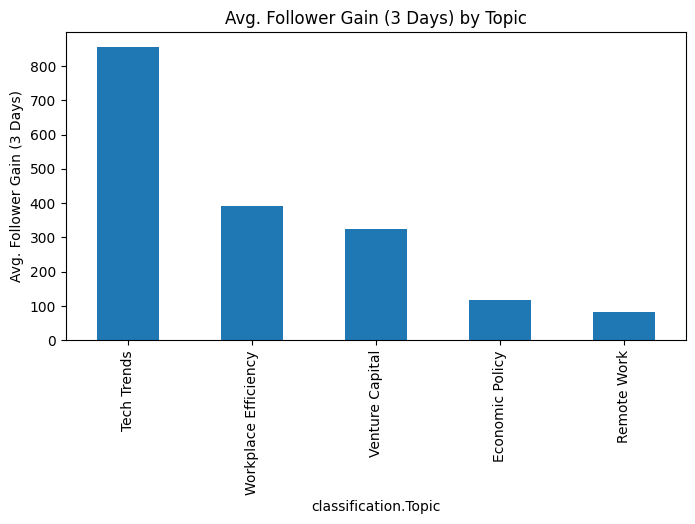

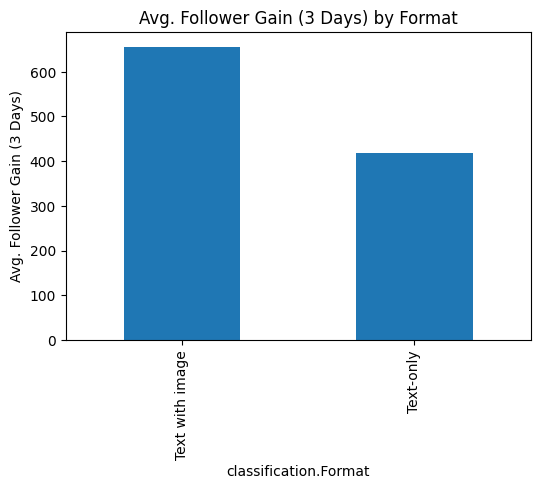

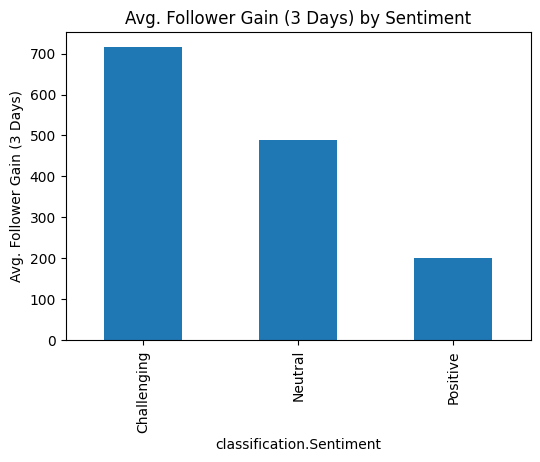

In [57]:
import matplotlib.pyplot as plt

# By topic
topic_gain.plot(kind='bar', figsize=(8,4), title='Avg. Follower Gain (3 Days) by Topic')
plt.ylabel('Avg. Follower Gain (3 Days)')
plt.show()

# By format
format_gain.plot(kind='bar', figsize=(6,4), title='Avg. Follower Gain (3 Days) by Format')
plt.ylabel('Avg. Follower Gain (3 Days)')
plt.show()

# By sentiment
sentiment_gain.plot(kind='bar', figsize=(6,4), title='Avg. Follower Gain (3 Days) by Sentiment')
plt.ylabel('Avg. Follower Gain (3 Days)')
plt.show()

In [58]:
# By topic
print(merged.groupby('classification.Topic')['follower_gain_3d'].mean().sort_values(ascending=False))

# By format
print(merged.groupby('classification.Format')['follower_gain_3d'].mean().sort_values(ascending=False))

# By sentiment
print(merged.groupby('classification.Sentiment')['follower_gain_3d'].mean().sort_values(ascending=False))

# By content framework
print(merged.groupby('classification.Content Framework')['follower_gain_3d'].mean().sort_values(ascending=False))

classification.Topic
Tech Trends             855.6
Workplace Efficiency    392.0
Venture Capital         323.0
Economic Policy         117.0
Remote Work              81.0
Name: follower_gain_3d, dtype: float64
classification.Format
Text with image    656.166667
Text-only          418.000000
Name: follower_gain_3d, dtype: float64
classification.Sentiment
Challenging    716.333333
Neutral        489.000000
Positive       202.000000
Name: follower_gain_3d, dtype: float64
classification.Content Framework
Rant–Resolve             703.000000
Hook–Problem–Solution    549.333333
Question–Response        489.000000
Name: follower_gain_3d, dtype: float64


In [59]:
import pandas as pd

# Select features to encode
features = [
    'classification.Topic',
    'classification.Format',
    'classification.Sentiment',
    'classification.Content Framework',
    'classification.Narrative Type',
    'classification.Text Tone'
]

# One-hot encode
df_corr = pd.get_dummies(merged[features])
df_corr['follower_gain_3d'] = merged['follower_gain_3d']

# Compute correlations
correlations = df_corr.corr()['follower_gain_3d'].sort_values(ascending=False)
print(correlations)

follower_gain_3d                                          1.000000
classification.Text Tone_Technical                        0.819550
classification.Topic_Tech Trends                          0.574309
classification.Sentiment_Challenging                      0.363601
classification.Narrative Type_Educational                 0.274583
classification.Text Tone_Casual                           0.258225
classification.Format_Text with image                     0.206842
classification.Content Framework_Rant–Resolve             0.124298
classification.Narrative Type_Discussion                 -0.057175
classification.Content Framework_Question–Response       -0.057175
classification.Sentiment_Neutral                         -0.057175
classification.Content Framework_Hook–Problem–Solution   -0.071504
classification.Narrative Type_Exposé                     -0.120356
classification.Topic_Workplace Efficiency                -0.120356
classification.Text Tone_Critical                        -0.12

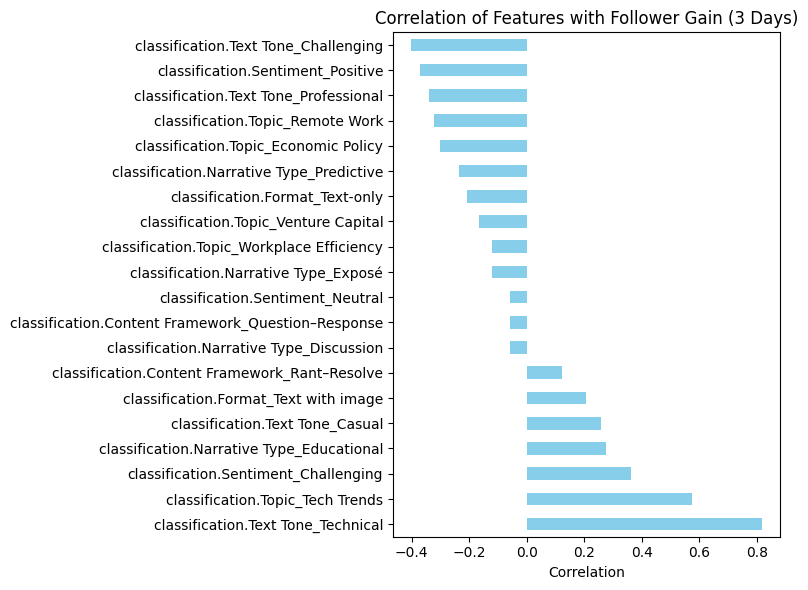

In [60]:
import matplotlib.pyplot as plt

# Show top 10 positive and negative correlations
top_corr = correlations.drop('follower_gain_3d').sort_values(ascending=False)
top_corr = pd.concat([top_corr.head(10), top_corr.tail(10)])

plt.figure(figsize=(8,6))
top_corr.plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Follower Gain (3 Days)')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

In [61]:
# Show all feature correlations with follower gain, sorted
correlations = df_corr.corr()['follower_gain_3d'].sort_values(ascending=False)
print(correlations)

follower_gain_3d                                          1.000000
classification.Text Tone_Technical                        0.819550
classification.Topic_Tech Trends                          0.574309
classification.Sentiment_Challenging                      0.363601
classification.Narrative Type_Educational                 0.274583
classification.Text Tone_Casual                           0.258225
classification.Format_Text with image                     0.206842
classification.Content Framework_Rant–Resolve             0.124298
classification.Narrative Type_Discussion                 -0.057175
classification.Content Framework_Question–Response       -0.057175
classification.Sentiment_Neutral                         -0.057175
classification.Content Framework_Hook–Problem–Solution   -0.071504
classification.Narrative Type_Exposé                     -0.120356
classification.Topic_Workplace Efficiency                -0.120356
classification.Text Tone_Critical                        -0.12

In [62]:
# Show only Narrative Type correlations
narrative_corr = correlations[correlations.index.str.contains('Narrative Type')]
print(narrative_corr)

classification.Narrative Type_Educational    0.274583
classification.Narrative Type_Discussion    -0.057175
classification.Narrative Type_Exposé        -0.120356
classification.Narrative Type_Predictive    -0.234343
Name: follower_gain_3d, dtype: float64


In [63]:
  # Top 3 posts by follower gain
  print(merged.sort_values('follower_gain_3d', ascending=False)[['publish_date', 'follower_gain_3d', 'classification.Topic', 'classification.Text Tone', 'classification.Sentiment', 'data.postText']].head(3))
  # Bottom 3 posts
  print(merged.sort_values('follower_gain_3d')[['publish_date', 'follower_gain_3d', 'classification.Topic', 'classification.Text Tone', 'classification.Sentiment', 'data.postText']].head(3))

  publish_date  follower_gain_3d classification.Topic classification.Text Tone classification.Sentiment  \
7   2025-01-06              1835          Tech Trends                Technical              Challenging   
1   2025-01-22              1189          Tech Trends                   Casual              Challenging   
3   2024-12-26               548          Tech Trends             Professional              Challenging   

                                       data.postText  
7  Sam Altman & The OpenAI Team Just Dropped a Bo...  
1  Elon Musk calls BS on the $500B AI investment ...  
3  Having talked with a few dozen tech founders &...  
  publish_date  follower_gain_3d classification.Topic classification.Text Tone classification.Sentiment  \
0   2024-10-11                81          Remote Work             Professional                 Positive   
8   2025-02-19               117      Economic Policy              Challenging              Challenging   
4   2025-02-08               2

In [64]:
  combo = merged.groupby(['classification.Topic', 'classification.Text Tone', 'classification.Format'])['follower_gain_3d'].mean().sort_values(ascending=False)
  print(combo.head(10))

classification.Topic  classification.Text Tone  classification.Format
Tech Trends           Technical                 Text with image          1835.0
                      Casual                    Text with image          1189.0
                      Professional              Text-only                 548.0
                      Casual                    Text-only                 489.0
Workplace Efficiency  Critical                  Text with image           392.0
Venture Capital       Professional              Text with image           323.0
Tech Trends           Challenging               Text-only                 217.0
Economic Policy       Challenging               Text with image           117.0
Remote Work           Professional              Text with image            81.0
Name: follower_gain_3d, dtype: float64


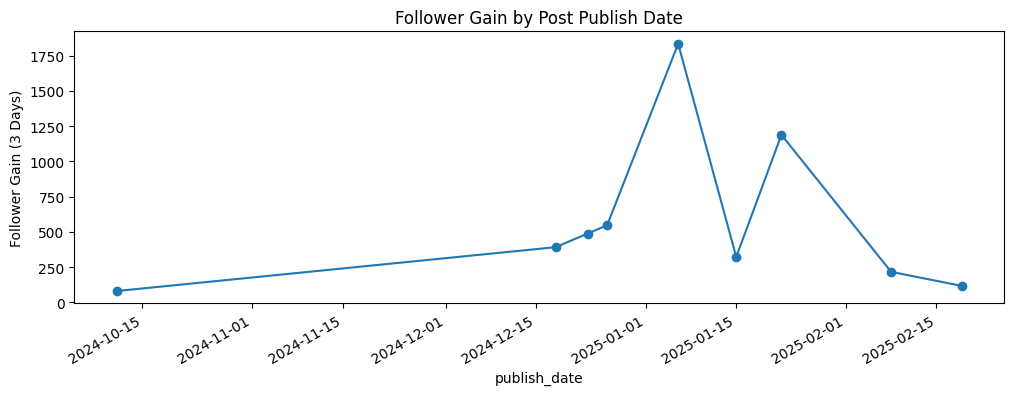

In [65]:
  merged.set_index('publish_date').sort_index()['follower_gain_3d'].plot(marker='o', figsize=(12,4), title='Follower Gain by Post Publish Date')
  plt.ylabel('Follower Gain (3 Days)')
  plt.show()

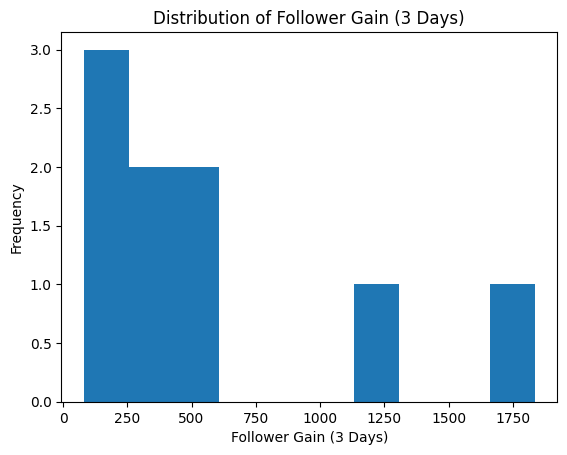

In [66]:
  merged['follower_gain_3d'].plot(kind='hist', bins=10, title='Distribution of Follower Gain (3 Days)')
  plt.xlabel('Follower Gain (3 Days)')
  plt.show()

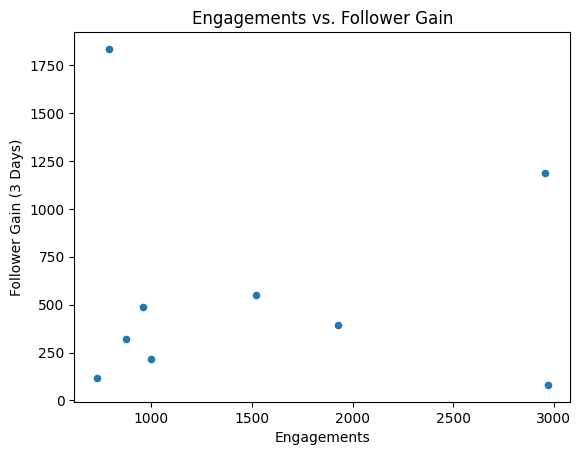

In [67]:
  merged.plot.scatter(x='engagements', y='follower_gain_3d', title='Engagements vs. Follower Gain')
  plt.xlabel('Engagements')
  plt.ylabel('Follower Gain (3 Days)')
  plt.show()

In [68]:
# Show all columns for the top post
top_post = merged.sort_values('follower_gain_3d', ascending=False).iloc[0]
print(top_post)

url                                 https://www.linkedin.com/feed/update/urn:li:ac...
publish_date                                                      2025-01-06 00:00:00
engagements                                                                       787
impressions                                                                    130086
timestamp                                                  2025-07-17T12:01:03.803213
data.postText                       Sam Altman & The OpenAI Team Just Dropped a Bo...
data.reactions.total                                                              321
data.reactions.types                [{'type': 'LIKE', 'alt': 'like'}, {'type': 'EN...
data.reactions.commentsCount                                                      428
data.comments                       [{'author': 'Cameron Campbell', 'text': 'There...
classification.Format                                                 Text with image
classification.Text Tone                              

In [69]:
import pandas as pd
import json

# Load the classified posts JSONL
classified_path = '../../backend/data/classified_posts.jsonl'
rows = []
with open(classified_path, 'r', encoding='utf-8') as f:
    for line in f:
        rows.append(json.loads(line))
df = pd.json_normalize(rows)
print(df.columns.tolist())
df.head()


['timestamp', 'url', 'data.postText', 'data.reactions.total', 'data.reactions.types', 'data.reactions.commentsCount', 'data.comments', 'data.format', 'classification.Format', 'classification.Text Tone', 'classification.Topic', 'classification.Sentiment', 'classification.Narrative Type', 'classification.Content Framework', 'classification.Call to Action', 'classification.Audience Persona', 'classification.Length', 'classification.Hashtags', 'classification.Question Present', 'classification.Storytelling', 'classification.Value Proposition', 'classification.Engagement Hook']


,timestamp,url,data.postText,data.reactions.total,data.reactions.types,data.reactions.commentsCount,data.comments,data.format,classification.Format,classification.Text Tone,classification.Topic,classification.Sentiment,classification.Narrative Type,classification.Content Framework,classification.Call to Action,classification.Audience Persona,classification.Length,classification.Hashtags,classification.Question Present,classification.Storytelling,classification.Value Proposition,classification.Engagement Hook
0,2025-07-20T19:23:16.630643,https://www.linkedin.com/feed/update/urn:li:ac...,"Is NVIDIA, OpenAI, Microsoft Etc, in trouble? ...",4845,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'IN...",631,"[{'author': 'David Stepania', 'text': 'Join 10...",Text with image,Text-only,Critical,AI & Machine Learning,Mixed,Discussion,Question–Response,Comment,Executives,Long,[],True,True,Challenging the cost-effectiveness and innovat...,True
1,2025-07-20T19:23:24.491288,https://www.linkedin.com/feed/update/urn:li:ac...,Spotify's HR chief says remote staff aren't 'c...,2826,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'PR...",113,"[{'author': 'David Stepania', 'text': 'Good mo...",Text-only,Text-only,Professional,Remote Work,Positive,Case Study,Question–Response,Comment,HR/Recruiters,Medium,[],True,True,Highlighting the benefits of Spotify's remote ...,True
2,2025-07-20T19:23:32.569989,https://www.linkedin.com/feed/update/urn:li:ac...,Elon Musk calls BS on the $500B AI investment ...,2021,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'IN...",846,"[{'author': 'David Stepania', 'text': 'Looks l...",Text with image,Text-only,Critical,AI & Machine Learning,Challenging,Discussion,Story–Lesson,Comment,General Audience,Long,[],True,True,Insight into the massive scale of AI investmen...,True
3,2025-07-20T19:23:40.724621,https://www.linkedin.com/feed/update/urn:li:ac...,Stanford just dropped a bomb: 9.5% of engineer...,1088,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'IN...",781,"[{'author': 'David Stepania', 'text': 'Yegor D...",Text with image,Text-only,Critical,Remote Work,Challenging,Exposé,Story–Lesson,Comment,Executives,Long,[],True,True,Exposing the inefficiencies and deceptive prac...,True
4,2025-07-20T19:23:48.936259,https://www.linkedin.com/feed/update/urn:li:ac...,Having talked with a few dozen tech founders &...,716,"[{'type': 'LIKE', 'alt': 'like'}, {'type': 'IN...",770,"[{'author': 'David Stepania', 'text': 'Join 10...",Text with image,Text-only,Professional,AI & Machine Learning,Mixed,Discussion,Question–Response,Comment,Founders,Medium,[],True,True,AI has eliminated the need for many critical p...,True


In [70]:
# Flatten classification fields
for col in df.columns:
    if col.startswith('classification.'):
        new_col = col.replace('classification.', '')
        df[new_col] = df[col]

In [71]:
for col in [
    'Format', 'Text Tone', 'Topic', 'Sentiment', 'Narrative Type',
    'Content Framework', 'Call to Action', 'Audience Persona', 'Length'
]:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


Format value counts:
Format
Text-only          45
Text with image     5
Name: count, dtype: int64

Text Tone value counts:
Text Tone
Professional     19
Critical         16
Challenging       6
Casual            6
Technical         2
Inspirational     1
Name: count, dtype: int64

Topic value counts:
Topic
AI & Machine Learning    20
Tech Trends              10
Entrepreneurship          5
Remote Work               4
Economic Policy           4
Venture Capital           2
Career Advice             2
Hiring & Recruiting       1
Marketing                 1
Leadership                1
Name: count, dtype: int64

Sentiment value counts:
Sentiment
Challenging    18
Positive       15
Mixed          11
Neutral         4
Negative        1
Critical        1
Name: count, dtype: int64

Narrative Type value counts:
Narrative Type
Discussion        30
Announcement       7
Case Study         6
Exposé             2
Predictive         2
Opinion            2
Personal Story     1
Name: count, dtype: int64


In [72]:
print(df['Question Present'].value_counts())
print(df['Storytelling'].value_counts())
print(df['Engagement Hook'].value_counts())

Question Present
True     42
False     8
Name: count, dtype: int64
Storytelling
True     41
False     9
Name: count, dtype: int64
Engagement Hook
True     48
False     2
Name: count, dtype: int64


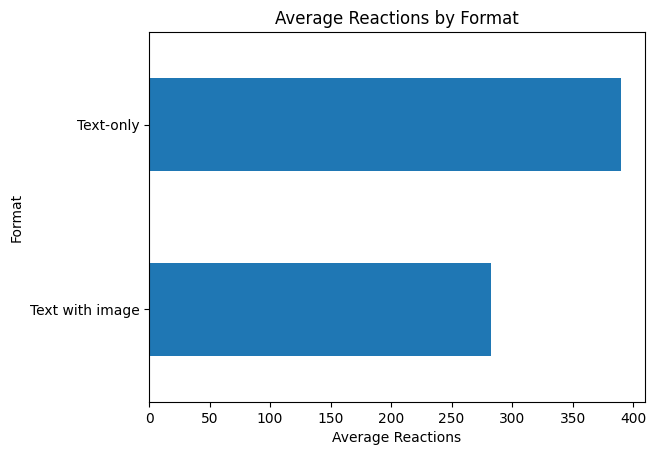

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Average reactions by Format
df.groupby('Format')['data.reactions.total'].mean().sort_values().plot(kind='barh')
plt.title('Average Reactions by Format')
plt.xlabel('Average Reactions')
plt.show()

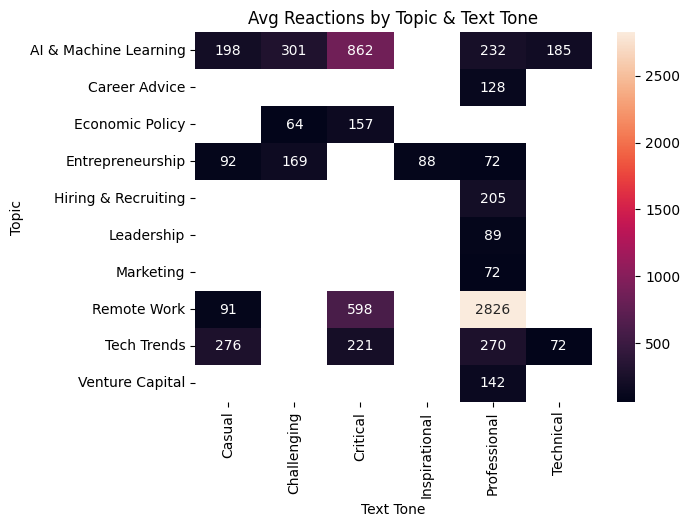

In [74]:
pivot = df.pivot_table(
    index='Topic',
    columns='Text Tone',
    values='data.reactions.total',
    aggfunc='mean'
)
sns.heatmap(pivot, annot=True, fmt='.0f')
plt.title('Avg Reactions by Topic & Text Tone')
plt.show()

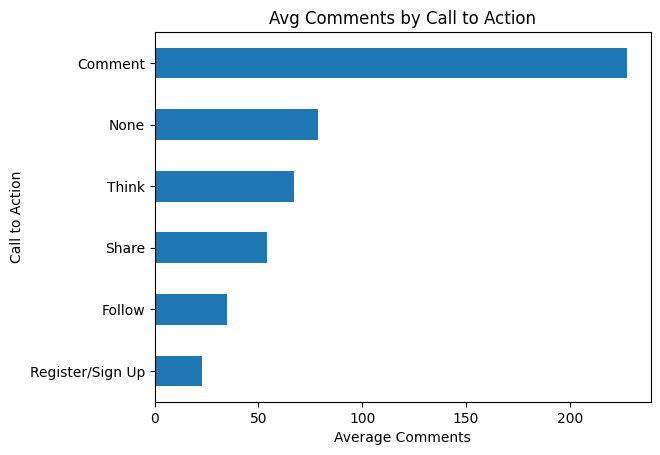

In [75]:
df.groupby('Call to Action')['data.reactions.commentsCount'].mean().sort_values().plot(kind='barh')
plt.title('Avg Comments by Call to Action')
plt.xlabel('Average Comments')
plt.show()

In [76]:
import pandas as pd

analytics_path = '../../backend/data/Content_2024-06-30_2025-06-29_DavidStepania.xlsx'

# Load followers sheet (header is likely on row 2)
df_followers = pd.read_excel(analytics_path, sheet_name='FOLLOWERS', header=2)
df_followers['Date'] = pd.to_datetime(df_followers['Date'])

In [77]:
print(df_followers)

          Date  New followers
0   2024-06-30              6
1   2024-07-01              5
2   2024-07-02             11
3   2024-07-03             11
4   2024-07-04              9
..         ...            ...
360 2025-06-25             22
361 2025-06-26             19
362 2025-06-27              7
363 2025-06-28             10
364 2025-06-29              3

[365 rows x 2 columns]


In [78]:
import json

classified_path = '../../backend/data/classified_posts.jsonl'
rows = []
with open(classified_path, 'r', encoding='utf-8') as f:
    for line in f:
        rows.append(json.loads(line))
df_classified = pd.json_normalize(rows)
df_classified['publish_date'] = pd.to_datetime(df_classified['timestamp'].str[:10])  # or use a dedicated publish_date if available

In [79]:
print(df_classified)

                     timestamp                                                url  \
0   2025-07-20T19:23:16.630643  https://www.linkedin.com/feed/update/urn:li:ac...   
1   2025-07-20T19:23:24.491288  https://www.linkedin.com/feed/update/urn:li:ac...   
2   2025-07-20T19:23:32.569989  https://www.linkedin.com/feed/update/urn:li:ac...   
3   2025-07-20T19:23:40.724621  https://www.linkedin.com/feed/update/urn:li:ac...   
4   2025-07-20T19:23:48.936259  https://www.linkedin.com/feed/update/urn:li:ac...   
5   2025-07-20T19:23:56.683382  https://www.linkedin.com/feed/update/urn:li:ac...   
6   2025-07-20T19:24:05.323243  https://www.linkedin.com/feed/update/urn:li:ac...   
7   2025-07-20T19:24:13.512765  https://www.linkedin.com/feed/update/urn:li:ac...   
8   2025-07-20T19:24:21.624036  https://www.linkedin.com/feed/update/urn:li:ac...   
9   2025-07-20T19:24:29.730637  https://www.linkedin.com/feed/update/urn:li:ac...   
10  2025-07-20T19:24:37.523558  https://www.linkedin.com/feed/upd

In [80]:
# Merge classified posts with followers by date
df_classified['publish_date'] = pd.to_datetime(df_classified['publish_date'])
df_followers = df_followers.sort_values('Date')

# For each post, sum new followers on publish_date + next 3 days
def get_follower_gain(row):
    mask = (df_followers['Date'] >= row['publish_date']) & (df_followers['Date'] <= row['publish_date'] + pd.Timedelta(days=3))
    return df_followers.loc[mask, 'New followers'].sum()

df_classified['follower_gain_3d'] = df_classified.apply(get_follower_gain, axis=1)

In [81]:
# Example: Average follower gain by Format
print(df_classified.groupby('Format')['follower_gain_3d'].mean().sort_values(ascending=False))

# Example: By Topic
print(df_classified.groupby('Topic')['follower_gain_3d'].mean().sort_values(ascending=False))

# Example: By Content Framework
print(df_classified.groupby('Content Framework')['follower_gain_3d'].mean().sort_values(ascending=False))

KeyError: 'Format'

In [82]:
print(df_classified.columns.tolist())

['timestamp', 'url', 'data.postText', 'data.reactions.total', 'data.reactions.types', 'data.reactions.commentsCount', 'data.comments', 'data.format', 'classification.Format', 'classification.Text Tone', 'classification.Topic', 'classification.Sentiment', 'classification.Narrative Type', 'classification.Content Framework', 'classification.Call to Action', 'classification.Audience Persona', 'classification.Length', 'classification.Hashtags', 'classification.Question Present', 'classification.Storytelling', 'classification.Value Proposition', 'classification.Engagement Hook', 'publish_date', 'follower_gain_3d']


In [83]:
# Flatten classification fields
for col in df_classified.columns:
    if col.startswith('classification.'):
        new_col = col.replace('classification.', '')
        df_classified[new_col] = df_classified[col]

In [84]:
# Example: Average follower gain by Format
print(df_classified.groupby('Format')['follower_gain_3d'].mean().sort_values(ascending=False))

# Example: By Topic
print(df_classified.groupby('Topic')['follower_gain_3d'].mean().sort_values(ascending=False))

# Example: By Content Framework
print(df_classified.groupby('Content Framework')['follower_gain_3d'].mean().sort_values(ascending=False))

Format
Text with image    0.0
Text-only          0.0
Name: follower_gain_3d, dtype: float64
Topic
AI & Machine Learning    0.0
Career Advice            0.0
Economic Policy          0.0
Entrepreneurship         0.0
Hiring & Recruiting      0.0
Leadership               0.0
Marketing                0.0
Remote Work              0.0
Tech Trends              0.0
Venture Capital          0.0
Name: follower_gain_3d, dtype: float64
Content Framework
Hook–Problem–Solution    0.0
Listicle                 0.0
Other                    0.0
Question–Response        0.0
Rant–Resolve             0.0
Story–Lesson             0.0
Name: follower_gain_3d, dtype: float64


In [85]:
print(df_classified.columns.tolist())

['timestamp', 'url', 'data.postText', 'data.reactions.total', 'data.reactions.types', 'data.reactions.commentsCount', 'data.comments', 'data.format', 'classification.Format', 'classification.Text Tone', 'classification.Topic', 'classification.Sentiment', 'classification.Narrative Type', 'classification.Content Framework', 'classification.Call to Action', 'classification.Audience Persona', 'classification.Length', 'classification.Hashtags', 'classification.Question Present', 'classification.Storytelling', 'classification.Value Proposition', 'classification.Engagement Hook', 'publish_date', 'follower_gain_3d', 'Format', 'Text Tone', 'Topic', 'Sentiment', 'Narrative Type', 'Content Framework', 'Call to Action', 'Audience Persona', 'Length', 'Hashtags', 'Question Present', 'Storytelling', 'Value Proposition', 'Engagement Hook']


In [86]:
print(df_classified['Format'].head())
print(df_classified['Format'].unique())

0    Text-only
1    Text-only
2    Text-only
3    Text-only
4    Text-only
Name: Format, dtype: object
['Text-only' 'Text with image']


In [87]:
print(df_classified.groupby('Format')['follower_gain_3d'].mean().sort_values(ascending=False))

Format
Text with image    0.0
Text-only          0.0
Name: follower_gain_3d, dtype: float64


In [88]:
print(df_classified['follower_gain_3d'].describe())
print(df_classified[['publish_date', 'follower_gain_3d']].head(10))

count    50.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: follower_gain_3d, dtype: float64
  publish_date  follower_gain_3d
0   2025-07-20                 0
1   2025-07-20                 0
2   2025-07-20                 0
3   2025-07-20                 0
4   2025-07-20                 0
5   2025-07-20                 0
6   2025-07-20                 0
7   2025-07-20                 0
8   2025-07-20                 0
9   2025-07-20                 0


In [89]:
print(df_classified['publish_date'].head(10))
print(df_followers['Date'].head(10))

0   2025-07-20
1   2025-07-20
2   2025-07-20
3   2025-07-20
4   2025-07-20
5   2025-07-20
6   2025-07-20
7   2025-07-20
8   2025-07-20
9   2025-07-20
Name: publish_date, dtype: datetime64[ns]
0   2024-06-30
1   2024-07-01
2   2024-07-02
3   2024-07-03
4   2024-07-04
5   2024-07-05
6   2024-07-06
7   2024-07-07
8   2024-07-08
9   2024-07-09
Name: Date, dtype: datetime64[ns]


In [90]:
print(df_classified.columns)
# or
print(df_classified[['url', 'data.postText']].head())

Index(['timestamp', 'url', 'data.postText', 'data.reactions.total', 'data.reactions.types',
       'data.reactions.commentsCount', 'data.comments', 'data.format', 'classification.Format',
       'classification.Text Tone', 'classification.Topic', 'classification.Sentiment', 'classification.Narrative Type',
       'classification.Content Framework', 'classification.Call to Action', 'classification.Audience Persona',
       'classification.Length', 'classification.Hashtags', 'classification.Question Present',
       'classification.Storytelling', 'classification.Value Proposition', 'classification.Engagement Hook',
       'publish_date', 'follower_gain_3d', 'Format', 'Text Tone', 'Topic', 'Sentiment', 'Narrative Type',
       'Content Framework', 'Call to Action', 'Audience Persona', 'Length', 'Hashtags', 'Question Present',
       'Storytelling', 'Value Proposition', 'Engagement Hook'],
      dtype='object')
                                                 url                           

In [91]:
# Load TOP POSTS sheet
df_top_posts = pd.read_excel(analytics_path, sheet_name='TOP POSTS', header=2)
# Clean and extract relevant columns
df_top_posts_clean = df_top_posts[['Post URL', 'Post publish date']].dropna()
df_top_posts_clean['Post URL'] = df_top_posts_clean['Post URL'].str.rstrip('/')

In [92]:
print(df_top_posts)


                                             Post URL Post publish date  Engagements  Unnamed: 3  \
0   https://www.linkedin.com/feed/update/urn:li:ac...          1/5/2025         5582         NaN   
1   https://www.linkedin.com/feed/update/urn:li:ac...        10/11/2024         2971         NaN   
2   https://www.linkedin.com/feed/update/urn:li:ac...         1/22/2025         2956         NaN   
3   https://www.linkedin.com/feed/update/urn:li:ac...        12/18/2024         1928         NaN   
4   https://www.linkedin.com/feed/update/urn:li:ac...        12/26/2024         1520         NaN   
5   https://www.linkedin.com/feed/update/urn:li:ac...          2/8/2025          999         NaN   
6   https://www.linkedin.com/feed/update/urn:li:ac...        12/23/2024          956         NaN   
7   https://www.linkedin.com/feed/update/urn:li:ac...         1/15/2025          871         NaN   
8   https://www.linkedin.com/feed/update/urn:li:ac...          1/6/2025          787         NaN   


In [93]:
df_classified['url_clean'] = df_classified['url'].str.rstrip('/')


In [94]:
# Merge publish date into classified DataFrame
df_classified = df_classified.merge(
    df_top_posts_clean.rename(columns={'Post URL': 'url_clean', 'Post publish date': 'real_publish_date'}),
    on='url_clean',
    how='left'
)
df_classified['real_publish_date'] = pd.to_datetime(df_classified['real_publish_date'])

In [95]:
print(df_classified)

                     timestamp                                                url  \
0   2025-07-20T19:23:16.630643  https://www.linkedin.com/feed/update/urn:li:ac...   
1   2025-07-20T19:23:24.491288  https://www.linkedin.com/feed/update/urn:li:ac...   
2   2025-07-20T19:23:32.569989  https://www.linkedin.com/feed/update/urn:li:ac...   
3   2025-07-20T19:23:40.724621  https://www.linkedin.com/feed/update/urn:li:ac...   
4   2025-07-20T19:23:48.936259  https://www.linkedin.com/feed/update/urn:li:ac...   
5   2025-07-20T19:23:56.683382  https://www.linkedin.com/feed/update/urn:li:ac...   
6   2025-07-20T19:24:05.323243  https://www.linkedin.com/feed/update/urn:li:ac...   
7   2025-07-20T19:24:13.512765  https://www.linkedin.com/feed/update/urn:li:ac...   
8   2025-07-20T19:24:21.624036  https://www.linkedin.com/feed/update/urn:li:ac...   
9   2025-07-20T19:24:29.730637  https://www.linkedin.com/feed/update/urn:li:ac...   
10  2025-07-20T19:24:37.523558  https://www.linkedin.com/feed/upd

In [96]:
def get_follower_gain(row):
    mask = (df_followers['Date'] >= row['real_publish_date']) & (df_followers['Date'] <= row['real_publish_date'] + pd.Timedelta(days=3))
    return df_followers.loc[mask, 'New followers'].sum()

df_classified['follower_gain_3d'] = df_classified.apply(get_follower_gain, axis=1)

In [97]:
print(df_classified)

                     timestamp                                                url  \
0   2025-07-20T19:23:16.630643  https://www.linkedin.com/feed/update/urn:li:ac...   
1   2025-07-20T19:23:24.491288  https://www.linkedin.com/feed/update/urn:li:ac...   
2   2025-07-20T19:23:32.569989  https://www.linkedin.com/feed/update/urn:li:ac...   
3   2025-07-20T19:23:40.724621  https://www.linkedin.com/feed/update/urn:li:ac...   
4   2025-07-20T19:23:48.936259  https://www.linkedin.com/feed/update/urn:li:ac...   
5   2025-07-20T19:23:56.683382  https://www.linkedin.com/feed/update/urn:li:ac...   
6   2025-07-20T19:24:05.323243  https://www.linkedin.com/feed/update/urn:li:ac...   
7   2025-07-20T19:24:13.512765  https://www.linkedin.com/feed/update/urn:li:ac...   
8   2025-07-20T19:24:21.624036  https://www.linkedin.com/feed/update/urn:li:ac...   
9   2025-07-20T19:24:29.730637  https://www.linkedin.com/feed/update/urn:li:ac...   
10  2025-07-20T19:24:37.523558  https://www.linkedin.com/feed/upd

In [98]:
print(df_classified.groupby('Format')['follower_gain_3d'].mean().sort_values(ascending=False))

Format
Text with image    675.800000
Text-only          363.044444
Name: follower_gain_3d, dtype: float64


Format
Text with image    675.800000
Text-only          363.044444
Name: follower_gain_3d, dtype: float64


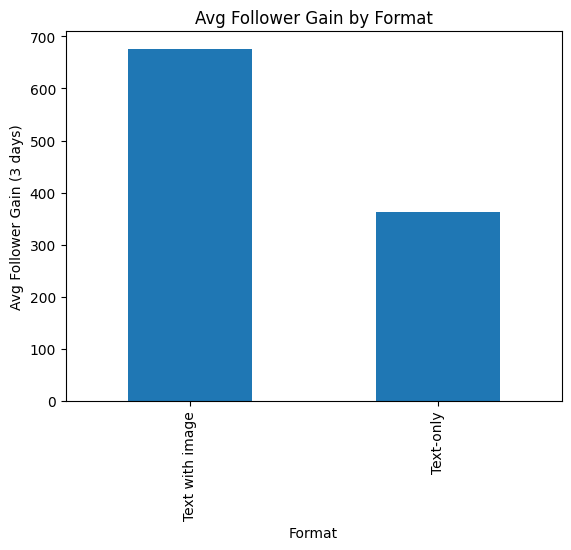

In [99]:
import matplotlib.pyplot as plt

format_gain = df_classified.groupby('Format')['follower_gain_3d'].mean().sort_values(ascending=False)
print(format_gain)
format_gain.plot(kind='bar', title='Avg Follower Gain by Format')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

Topic
Venture Capital          826.00
AI & Machine Learning    534.45
Tech Trends              449.60
Hiring & Recruiting      253.00
Remote Work              197.25
Entrepreneurship         157.20
Economic Policy          141.75
Marketing                140.00
Career Advice            138.50
Leadership                67.00
Name: follower_gain_3d, dtype: float64


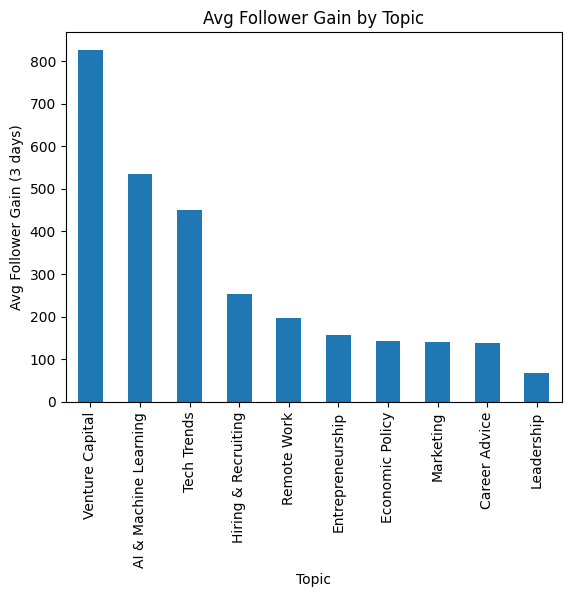

In [100]:
topic_gain = df_classified.groupby('Topic')['follower_gain_3d'].mean().sort_values(ascending=False)
print(topic_gain)
topic_gain.plot(kind='bar', title='Avg Follower Gain by Topic')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

Text Tone
Critical         574.375000
Casual           466.500000
Technical        448.500000
Professional     305.000000
Inspirational    250.000000
Challenging      130.833333
Name: follower_gain_3d, dtype: float64


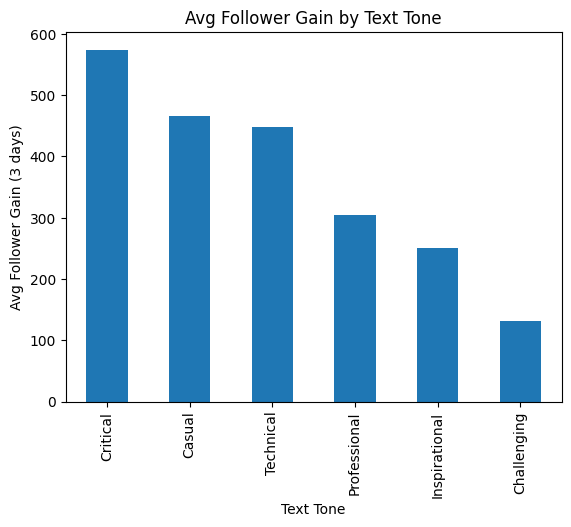

Sentiment
Mixed          642.090909
Neutral        527.500000
Challenging    437.611111
Negative       253.000000
Positive       154.733333
Critical        92.000000
Name: follower_gain_3d, dtype: float64


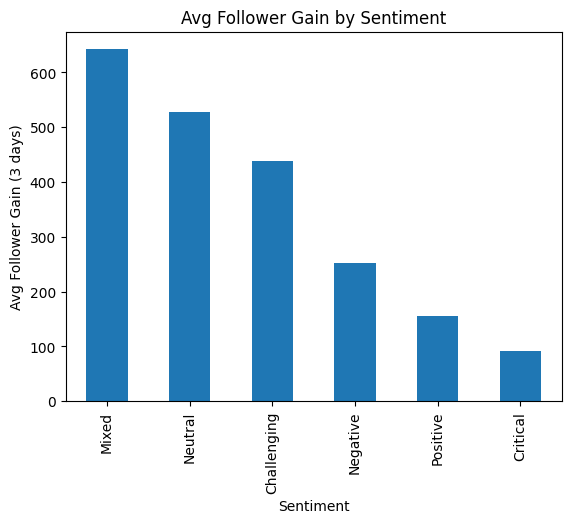

In [101]:
tone_gain = df_classified.groupby('Text Tone')['follower_gain_3d'].mean().sort_values(ascending=False)
print(tone_gain)
tone_gain.plot(kind='bar', title='Avg Follower Gain by Text Tone')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

sentiment_gain = df_classified.groupby('Sentiment')['follower_gain_3d'].mean().sort_values(ascending=False)
print(sentiment_gain)
sentiment_gain.plot(kind='bar', title='Avg Follower Gain by Sentiment')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

Narrative Type
Discussion        536.400000
Exposé            259.000000
Personal Story    255.000000
Case Study        198.666667
Opinion           183.500000
Announcement      146.428571
Predictive        133.500000
Name: follower_gain_3d, dtype: float64


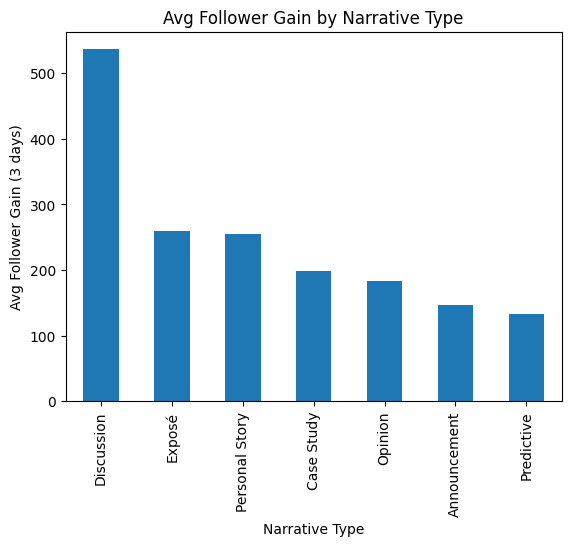

Content Framework
Question–Response        537.052632
Story–Lesson             342.450000
Hook–Problem–Solution    339.200000
Rant–Resolve             204.000000
Other                    138.500000
Listicle                  78.000000
Name: follower_gain_3d, dtype: float64


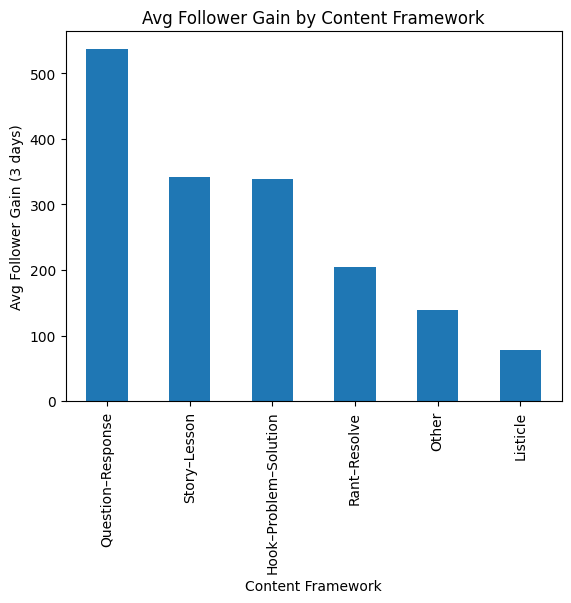

In [102]:
narrative_gain = df_classified.groupby('Narrative Type')['follower_gain_3d'].mean().sort_values(ascending=False)
print(narrative_gain)
narrative_gain.plot(kind='bar', title='Avg Follower Gain by Narrative Type')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

framework_gain = df_classified.groupby('Content Framework')['follower_gain_3d'].mean().sort_values(ascending=False)
print(framework_gain)
framework_gain.plot(kind='bar', title='Avg Follower Gain by Content Framework')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

In [103]:
print(df_classified.groupby('Engagement Hook')['follower_gain_3d'].mean())
print(df_classified.groupby('Storytelling')['follower_gain_3d'].mean())

Engagement Hook
False    138.500000
True     404.979167
Name: follower_gain_3d, dtype: float64
Storytelling
False    200.777778
True     436.804878
Name: follower_gain_3d, dtype: float64


Call to Action
Comment             469.083333
Share               372.000000
None                213.800000
Think               194.000000
Register/Sign Up     67.000000
Follow               58.000000
Name: follower_gain_3d, dtype: float64


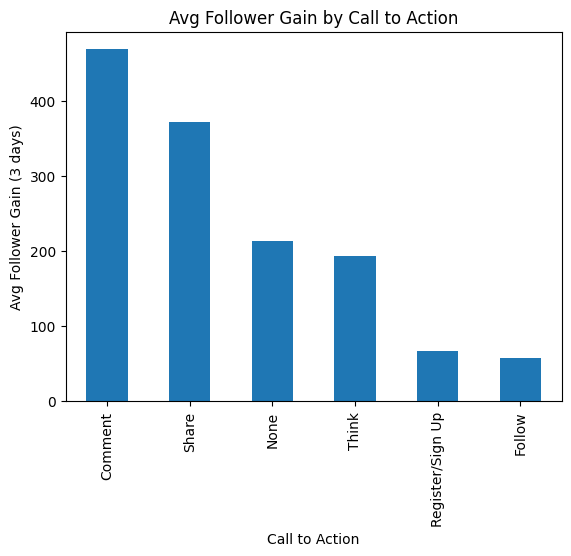

In [104]:
cta_gain = df_classified.groupby('Call to Action')['follower_gain_3d'].mean().sort_values(ascending=False)
print(cta_gain)
cta_gain.plot(kind='bar', title='Avg Follower Gain by Call to Action')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

Audience Persona
Marketers               1174.000000
Executives               580.200000
Founders                 400.500000
General Audience         389.214286
Engineers/Developers     221.333333
HR/Recruiters            167.000000
Tech People               92.000000
Job Seekers               67.000000
Name: follower_gain_3d, dtype: float64


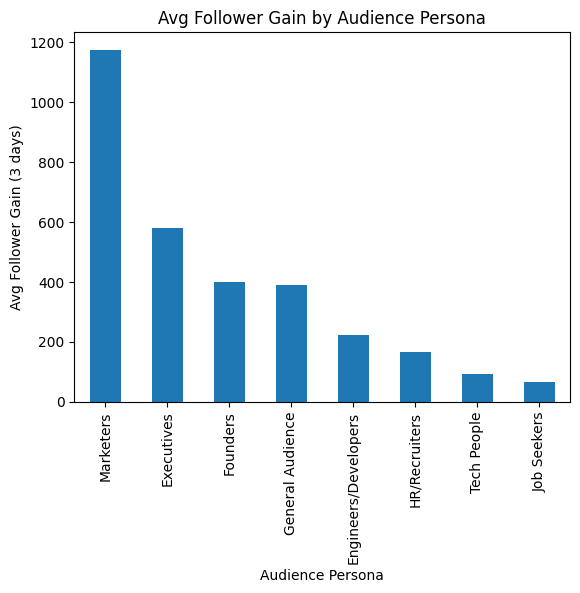

In [105]:
persona_gain = df_classified.groupby('Audience Persona')['follower_gain_3d'].mean().sort_values(ascending=False)
print(persona_gain)
persona_gain.plot(kind='bar', title='Avg Follower Gain by Audience Persona')
plt.ylabel('Avg Follower Gain (3 days)')
plt.show()

In [106]:
print(df_classified.groupby('Question Present')['follower_gain_3d'].mean())
# For hashtags, you might want to see if posts with any hashtags perform better:
df_classified['has_hashtags'] = df_classified['Hashtags'].apply(lambda x: bool(x) and len(x) > 0)
print(df_classified.groupby('has_hashtags')['follower_gain_3d'].mean())

Question Present
False    155.250000
True     439.857143
Name: follower_gain_3d, dtype: float64
has_hashtags
False    365.860465
True     569.142857
Name: follower_gain_3d, dtype: float64


In [107]:
top_posts = df_classified.sort_values('follower_gain_3d', ascending=False).head(10)
print(top_posts[['url', 'Format', 'Topic', 'Text Tone', 'Sentiment', 'Narrative Type', 'Content Framework', 'Call to Action', 'Audience Persona', 'Length', 'follower_gain_3d']])

                                                  url           Format                  Topic     Text Tone  \
0   https://www.linkedin.com/feed/update/urn:li:ac...        Text-only  AI & Machine Learning      Critical   
8   https://www.linkedin.com/feed/update/urn:li:ac...  Text with image  AI & Machine Learning      Critical   
36  https://www.linkedin.com/feed/update/urn:li:ac...        Text-only        Venture Capital  Professional   
13  https://www.linkedin.com/feed/update/urn:li:ac...        Text-only  AI & Machine Learning      Critical   
10  https://www.linkedin.com/feed/update/urn:li:ac...  Text with image            Tech Trends  Professional   
2   https://www.linkedin.com/feed/update/urn:li:ac...        Text-only  AI & Machine Learning      Critical   
28  https://www.linkedin.com/feed/update/urn:li:ac...        Text-only            Tech Trends        Casual   
16  https://www.linkedin.com/feed/update/urn:li:ac...        Text-only  AI & Machine Learning     Technical   
4

In [108]:
print("Top 3 posts by follower gain:")
print(df_classified.sort_values('follower_gain_3d', ascending=False)[['url', 'follower_gain_3d', 'Format', 'Topic', 'Text Tone']].head(3))
print("Bottom 3 posts by follower gain:")
print(df_classified.sort_values('follower_gain_3d')[['url', 'follower_gain_3d', 'Format', 'Topic', 'Text Tone']].head(3))

Top 3 posts by follower gain:
                                                  url  follower_gain_3d           Format                  Topic  \
0   https://www.linkedin.com/feed/update/urn:li:ac...              2211        Text-only  AI & Machine Learning   
8   https://www.linkedin.com/feed/update/urn:li:ac...              1835  Text with image  AI & Machine Learning   
36  https://www.linkedin.com/feed/update/urn:li:ac...              1329        Text-only        Venture Capital   

       Text Tone  
0       Critical  
8       Critical  
36  Professional  
Bottom 3 posts by follower gain:
                                                  url  follower_gain_3d           Format             Topic  \
45  https://www.linkedin.com/feed/update/urn:li:ac...                58  Text with image  Entrepreneurship   
49  https://www.linkedin.com/feed/update/urn:li:ac...                67        Text-only        Leadership   
34  https://www.linkedin.com/feed/update/urn:li:ac...                7

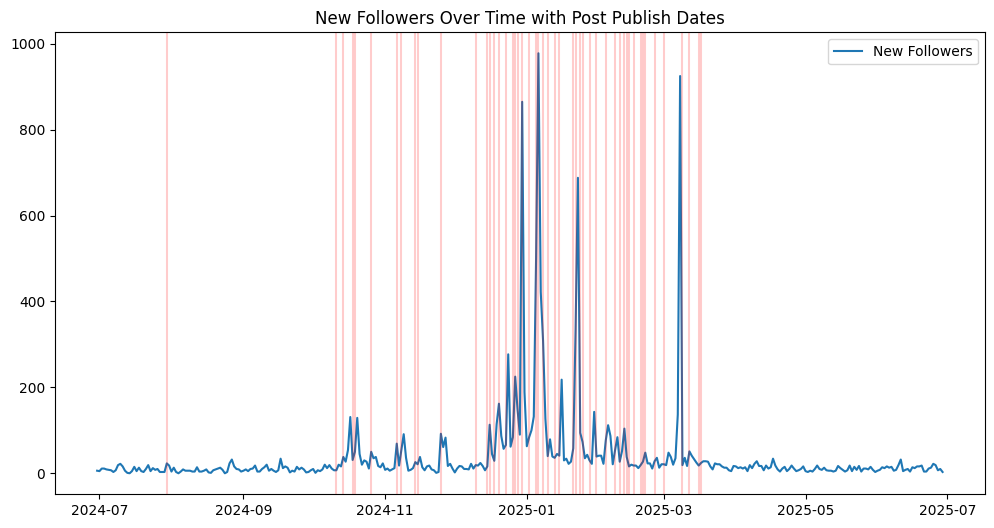

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_followers['Date'], df_followers['New followers'], label='New Followers')
for d in df_classified['real_publish_date']:
    plt.axvline(d, color='red', alpha=0.2)
plt.legend()
plt.title('New Followers Over Time with Post Publish Dates')
plt.show()

In [1]:
import pandas as pd
df = pd.read_excel('../../backend/data/Contenido_2024-06-27_2025-06-26_DavidTafur Vasquez.xlsx', sheet_name='PUBLICACIONES PRINCIPALES', header=2)
print(df[['Fecha de publicación']].head())

  Fecha de publicación
0            27/2/2025
1           26/12/2024
2            28/5/2025
3             8/4/2025
4             6/5/2025


/Users/edgar/workspace/chrome-lab/prisma/analysis/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set figure size for better plots
plt.rcParams['figure.figsize'] = (12, 8)


In [3]:
# Load the analytics data (followers) - adjusted for analysis/ path
analytics_path = "../backend/data/Contenido_Jesus_Cagide_20250721_20250727.xlsx"
df_followers = pd.read_excel(analytics_path, sheet_name='FOLLOWERS', header=2)

# Load the classified posts data - adjusted for analysis/ path
classified_path = "../backend/classified_posts_Jesus_Cagide.jsonl"
df_classified = pd.read_json(classified_path, lines=True)

print("Followers data shape:", df_followers.shape)
print("Classified posts shape:", df_classified.shape)
print("\nFollowers columns:", df_followers.columns.tolist())
print("Classified columns:", df_classified.columns.tolist())

FileNotFoundError: [Errno 2] No such file or directory: '../backend/data/Contenido_Jesus_Cagide_20250721_20250727.xlsx'

In [4]:
# Load the analytics data (followers) - corrected filename
analytics_path = "../backend/data/Content_2024-07-23_2025-07-22_JesusCagide.xlsx"
df_followers = pd.read_excel(analytics_path, sheet_name='FOLLOWERS', header=2)

# Load the classified posts data
classified_path = "../backend/data/classified_posts_Jesus_Cagide.jsonl"
df_classified = pd.read_json(classified_path, lines=True)

print("Followers data shape:", df_followers.shape)
print("Classified posts shape:", df_classified.shape)
print("\nFollowers columns:", df_followers.columns.tolist())
print("Classified columns:", df_classified.columns.tolist())

FileNotFoundError: [Errno 2] No such file or directory: '../backend/data/Content_2024-07-23_2025-07-22_JesusCagide.xlsx'

In [5]:
# Load the analytics data (followers) - corrected filename
analytics_path = "../../backend/data/Content_2024-07-23_2025-07-22_JesusCagide.xlsx"
df_followers = pd.read_excel(analytics_path, sheet_name='FOLLOWERS', header=2)

# Load the classified posts data
classified_path = "../../backend/data/classified_posts_Jesus_Cagide.jsonl"
df_classified = pd.read_json(classified_path, lines=True)

print("Followers data shape:", df_followers.shape)
print("Classified posts shape:", df_classified.shape)
print("\nFollowers columns:", df_followers.columns.tolist())
print("Classified columns:", df_classified.columns.tolist())

Followers data shape: (365, 2)
Classified posts shape: (50, 5)

Followers columns: ['Date', 'New followers']
Classified columns: ['timestamp', 'url', 'data', 'publish_date', 'classification']


/Users/edgar/workspace/chrome-lab/prisma/analysis/venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
# Clean and prepare followers data
df_followers['Date'] = pd.to_datetime(df_followers['Date'])
df_followers = df_followers.sort_values('Date')

# Clean and prepare classified data
df_classified['date'] = pd.to_datetime(df_classified['date'])
df_classified = df_classified.sort_values('date')

# Merge the datasets
df_merged = df_classified.merge(df_followers, left_on='date', right_on='Date', how='left')

print("Merged data shape:", df_merged.shape)
print("Date range:", df_merged['date'].min(), "to", df_merged['date'].max())

KeyError: 'date'

In [7]:
# Clean and prepare followers data
df_followers['Date'] = pd.to_datetime(df_followers['Date'])
df_followers = df_followers.sort_values('Date')

# Clean and prepare classified data - using 'publish_date' instead of 'date'
df_classified['publish_date'] = pd.to_datetime(df_classified['publish_date'])
df_classified = df_classified.sort_values('publish_date')

# Merge the datasets
df_merged = df_classified.merge(df_followers, left_on='publish_date', right_on='Date', how='left')

print("Merged data shape:", df_merged.shape)
print("Date range:", df_merged['publish_date'].min(), "to", df_merged['publish_date'].max())

Merged data shape: (50, 7)
Date range: 2024-07-30 00:00:00 to 2025-07-17 00:00:00


In [8]:
# Calculate follower gains (3-day window)
def calculate_follower_gain(row, df_followers, days=3):
    post_date = row['publish_date']
    future_date = post_date + timedelta(days=days)
    
    # Get follower count at post date
    current_followers = df_followers[df_followers['Date'] <= post_date]['New followers'].iloc[-1] if len(df_followers[df_followers['Date'] <= post_date]) > 0 else 0
    
    # Get follower count after days
    future_followers = df_followers[df_followers['Date'] <= future_date]['New followers'].iloc[-1] if len(df_followers[df_followers['Date'] <= future_date]) > 0 else 0
    
    return future_followers - current_followers

# Apply the function
df_merged['follower_gain_3d'] = df_merged.apply(lambda row: calculate_follower_gain(row, df_followers), axis=1)

print("Follower gains calculated!")
print("Average follower gain:", df_merged['follower_gain_3d'].mean())
print("Median follower gain:", df_merged['follower_gain_3d'].median())

Follower gains calculated!
Average follower gain: -2.88
Median follower gain: -2.0


In [9]:
# Check the followers data
print("Followers data sample:")
print(df_followers.head(10))
print("\nFollowers data info:")
print(df_followers.info())

# Check the merged data
print("\nMerged data sample:")
print(df_merged[['publish_date', 'Date', 'New followers']].head(10))

# Check if we have follower data for the post dates
print("\nChecking follower data availability:")
for i, row in df_merged.head(5).iterrows():
    post_date = row['publish_date']
    available_dates = df_followers[df_followers['Date'] <= post_date]
    print(f"Post {i}: {post_date} - Available follower data: {len(available_dates)} records")
    if len(available_dates) > 0:
        print(f"  Latest follower count: {available_dates['New followers'].iloc[-1]}")

Followers data sample:
        Date  New followers
0 2024-07-23              6
1 2024-07-24              2
2 2024-07-25              5
3 2024-07-26              1
4 2024-07-27              1
5 2024-07-28              0
6 2024-07-29              3
7 2024-07-30              4
8 2024-07-31              7
9 2024-08-01              2

Followers data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   New followers  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None

Merged data sample:
  publish_date       Date  New followers
0   2024-07-30 2024-07-30              4
1   2024-08-21 2024-08-21              7
2   2024-08-28 2024-08-28              2
3   2024-09-12 2024-09-12              6
4   2024-09-19 2024-09-19              0
5   2024-0

In [10]:
# First, calculate cumulative follower counts
df_followers['cumulative_followers'] = df_followers['New followers'].cumsum()

# Calculate follower gains (3-day window)
def calculate_follower_gain(row, df_followers, days=3):
    post_date = row['publish_date']
    future_date = post_date + timedelta(days=days)
    
    # Get cumulative follower count at post date
    current_data = df_followers[df_followers['Date'] <= post_date]
    current_followers = current_data['cumulative_followers'].iloc[-1] if len(current_data) > 0 else 0
    
    # Get cumulative follower count after days
    future_data = df_followers[df_followers['Date'] <= future_date]
    future_followers = future_data['cumulative_followers'].iloc[-1] if len(future_data) > 0 else 0
    
    return future_followers - current_followers

# Apply the function
df_merged['follower_gain_3d'] = df_merged.apply(lambda row: calculate_follower_gain(row, df_followers), axis=1)

print("Follower gains calculated!")
print("Average follower gain:", df_merged['follower_gain_3d'].mean())
print("Median follower gain:", df_merged['follower_gain_3d'].median())
print("Min follower gain:", df_merged['follower_gain_3d'].min())
print("Max follower gain:", df_merged['follower_gain_3d'].max())

# Show some examples
print("\nSample follower gains:")
sample_data = df_merged[['publish_date', 'follower_gain_3d']].head(10)
print(sample_data)

Follower gains calculated!
Average follower gain: 13.38
Median follower gain: 10.5
Min follower gain: 1
Max follower gain: 42

Sample follower gains:
  publish_date  follower_gain_3d
0   2024-07-30                13
1   2024-08-21                28
2   2024-08-28                11
3   2024-09-12                11
4   2024-09-19                10
5   2024-09-21                14
6   2024-09-27                10
7   2024-09-30                 5
8   2024-10-09                34
9   2024-10-16                32


In [11]:
# Extract date components
df_merged['day_of_week'] = df_merged['publish_date'].dt.day_name()
df_merged['month'] = df_merged['publish_date'].dt.month
df_merged['week_of_year'] = df_merged['publish_date'].dt.isocalendar().week
df_merged['day_of_year'] = df_merged['publish_date'].dt.dayofyear

# Create day ranges (7-day blocks)
df_merged['day_range'] = pd.cut(df_merged['day_of_year'], 
                                bins=range(1, 366, 7), 
                                labels=[f"Week {i}" for i in range(1, 53)])

# Analyze follower gains by day range
day_range_analysis = df_merged.groupby('day_range')['follower_gain_3d'].agg([
    'count', 'mean', 'median', 'sum'
]).round(2).dropna()

print("Follower Gains by Day Range (Weekly Blocks):")
print(day_range_analysis)

# Get top 3 day ranges
top_day_ranges = day_range_analysis.sort_values('median', ascending=False).head(3)
print("\nTop 3 Day Ranges for Follower Gains:")
print(top_day_ranges)

# Also analyze by month
month_analysis = df_merged.groupby('month')['follower_gain_3d'].agg([
    'count', 'mean', 'median', 'sum'
]).round(2)

print("\nFollower Gains by Month:")
print(month_analysis)

Follower Gains by Day Range (Weekly Blocks):
           count   mean  median  sum
day_range                           
Week 2         1   8.00     8.0    8
Week 18        1   6.00     6.0    6
Week 19        1   4.00     4.0    4
Week 21        1   7.00     7.0    7
Week 23        1  15.00    15.0   15
Week 24        2  18.00    18.0   36
Week 25        2  16.50    16.5   33
Week 26        1   2.00     2.0    2
Week 27        1   7.00     7.0    7
Week 28        2  14.50    14.5   29
Week 29        1   5.00     5.0    5
Week 31        1  13.00    13.0   13
Week 34        1  28.00    28.0   28
Week 35        1  11.00    11.0   11
Week 37        1  11.00    11.0   11
Week 38        2  12.00    12.0   24
Week 39        2   7.50     7.5   15
Week 41        1  34.00    34.0   34
Week 42        2  21.50    21.5   43
Week 43        4  24.50    24.0   98
Week 44        5  20.40    20.0  102
Week 45        4   8.25     8.0   33
Week 46        3  11.67    11.0   35
Week 47        4  13.75    16.

/var/folders/3_/8gzj76mx11182vlqppj4nqw80000gn/T/ipykernel_34320/824308094.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_range_analysis = df_merged.groupby('day_range')['follower_gain_3d'].agg([


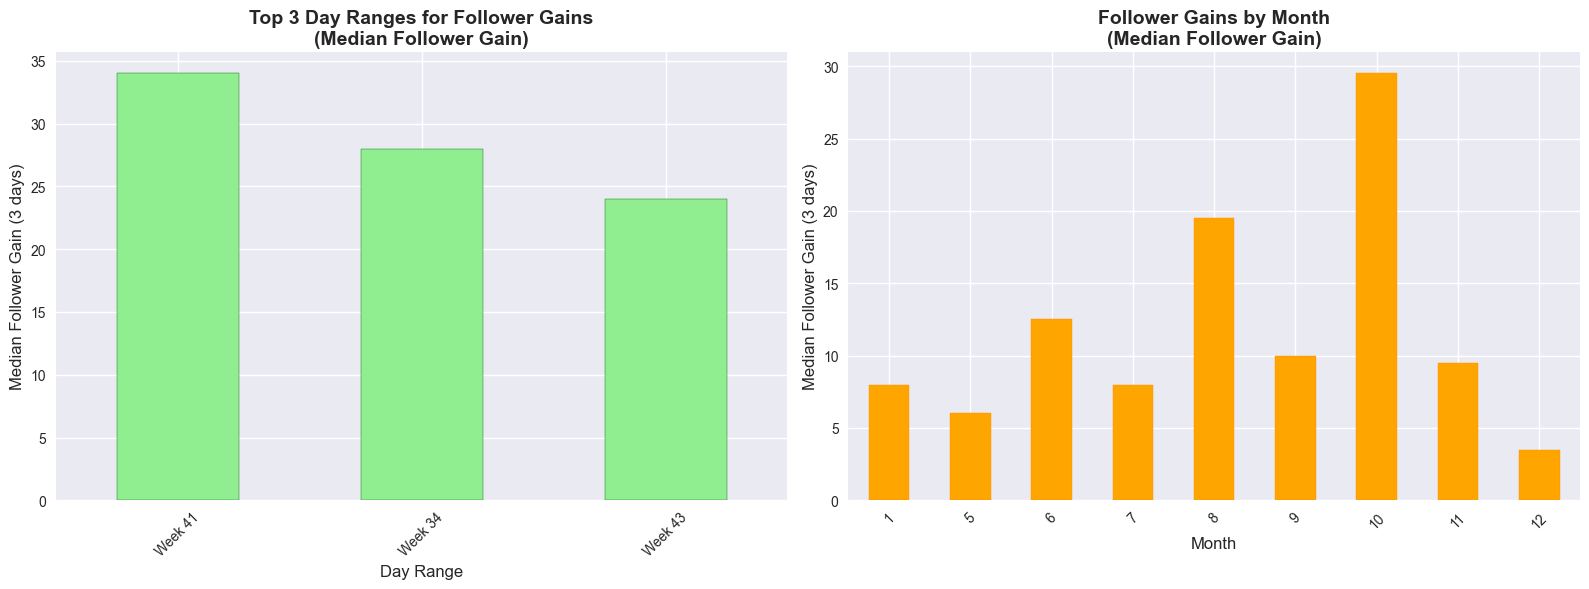


Detailed Statistics for Top Day Ranges:

Week 41:
  Posts: 1
  Median gain: 34.00
  Mean gain: 34.00
  Total gain: 34.00
  Date range: 2024-10-09 to 2024-10-09

Week 34:
  Posts: 1
  Median gain: 28.00
  Mean gain: 28.00
  Total gain: 28.00
  Date range: 2024-08-21 to 2024-08-21

Week 43:
  Posts: 4
  Median gain: 24.00
  Mean gain: 24.50
  Total gain: 98.00
  Date range: 2024-10-22 to 2024-10-25


In [12]:
# Create the visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Median follower gains by top day ranges
top_day_ranges['median'].plot(kind='bar', ax=ax1, color='lightgreen', edgecolor='darkgreen')
ax1.set_title('Top 3 Day Ranges for Follower Gains\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax1.set_xlabel('Day Range', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Monthly follower gains
month_analysis['median'].plot(kind='bar', ax=ax2, color='orange', edgecolor='darkorange')
ax2.set_title('Follower Gains by Month\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print detailed stats
print("\nDetailed Statistics for Top Day Ranges:")
for day_range in top_day_ranges.index:
    data = df_merged[df_merged['day_range'] == day_range]
    print(f"\n{day_range}:")
    print(f"  Posts: {len(data)}")
    print(f"  Median gain: {data['follower_gain_3d'].median():.2f}")
    print(f"  Mean gain: {data['follower_gain_3d'].mean():.2f}")
    print(f"  Total gain: {data['follower_gain_3d'].sum():.2f}")
    print(f"  Date range: {data['publish_date'].min().strftime('%Y-%m-%d')} to {data['publish_date'].max().strftime('%Y-%m-%d')}")

In [13]:
# Day of week analysis
day_analysis = df_merged.groupby('day_of_week')['follower_gain_3d'].agg([
    'count', 'mean', 'median', 'sum'
]).round(2)

print("Follower Gains by Day of Week:")
print(day_analysis)

# Week of year analysis
week_analysis = df_merged.groupby('week_of_year')['follower_gain_3d'].agg([
    'count', 'mean', 'median', 'sum'
]).round(2).dropna()

print("\nFollower Gains by Week of Year:")
print(week_analysis)

# Show the best performing weeks
top_weeks = week_analysis.sort_values('median', ascending=False).head(5)
print("\nTop 5 Weeks for Follower Gains:")
print(top_weeks)

Follower Gains by Day of Week:
             count   mean  median  sum
day_of_week                           
Friday           8   8.50     9.5   68
Monday           4   4.25     4.5   17
Saturday         3  10.67    10.0   32
Thursday        13  11.92    11.0  155
Tuesday          8  18.50    14.0  148
Wednesday       14  17.79    14.0  249

Follower Gains by Week of Year:
              count   mean  median  sum
week_of_year                           
3                 1   8.00     8.0    8
19                1   6.00     6.0    6
20                1   4.00     4.0    4
22                1   7.00     7.0    7
24                2  11.00    11.0   22
25                3  20.67    23.0   62
27                2   4.50     4.5    9
28                2  14.50    14.5   29
29                1   5.00     5.0    5
31                1  13.00    13.0   13
34                1  28.00    28.0   28
35                1  11.00    11.0   11
37                1  11.00    11.0   11
38                2  12.

ValueError: Length mismatch: Expected axis has 9 elements, new values have 12 elements

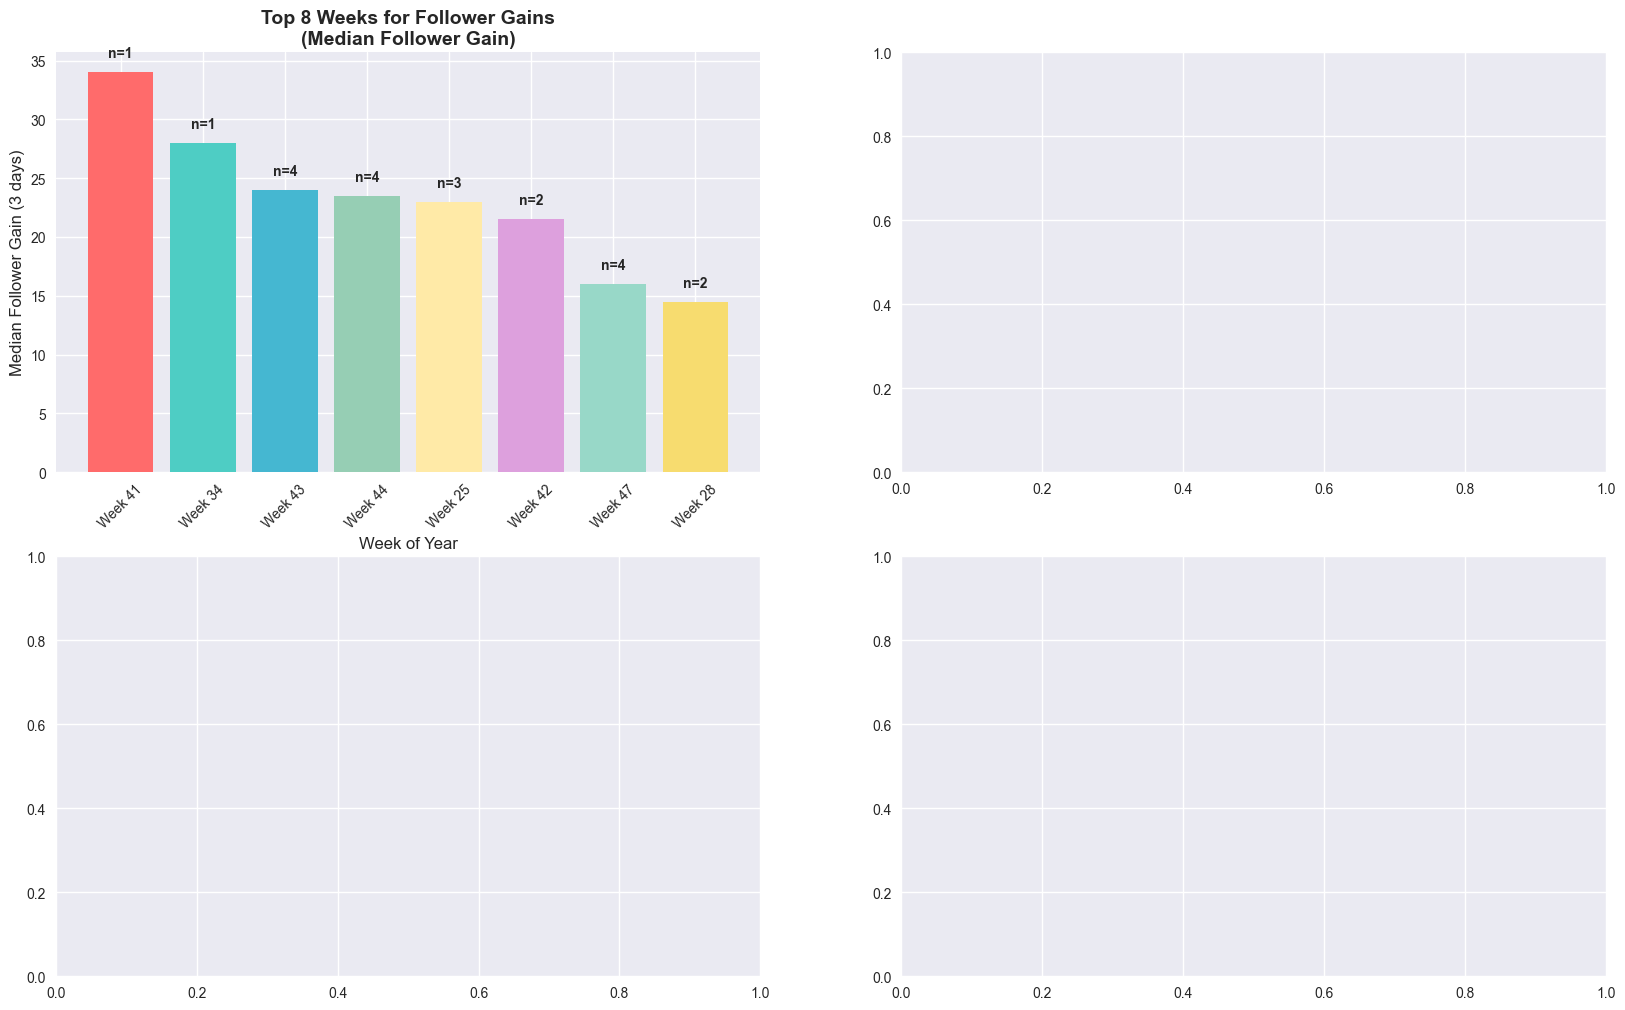

In [14]:
# Create a comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: Top performing weeks with post counts
top_weeks = week_analysis.sort_values('median', ascending=False).head(8)
bars = ax1.bar(range(len(top_weeks)), top_weeks['median'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F'])
ax1.set_title('Top 8 Weeks for Follower Gains\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax1.set_xlabel('Week of Year', fontsize=12)
ax1.set_xticks(range(len(top_weeks)))
ax1.set_xticklabels([f"Week {i}" for i in top_weeks.index], rotation=45)

# Add post count labels on bars
for i, (week, data) in enumerate(top_weeks.iterrows()):
    ax1.text(i, data['median'] + 1, f"n={int(data['count'])}", 
              ha='center', va='bottom', fontweight='bold')

# Plot 2: Monthly performance heatmap
month_data = month_analysis.copy()
month_data.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_data = month_data.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

im = ax2.imshow([month_data['median'].values], cmap='YlOrRd', aspect='auto')
ax2.set_title('Monthly Follower Gains\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Performance', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_xticks(range(len(month_data)))
ax2.set_xticklabels(month_data.index, rotation=45)
ax2.set_yticks([])

# Add value annotations
for i, value in enumerate(month_data['median']):
    if not pd.isna(value):
        ax2.text(i, 0, f'{value:.1f}', ha='center', va='center', fontweight='bold', color='white')

# Plot 3: Day of week performance
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data = day_analysis.reindex(day_order)

bars = ax3.bar(range(len(day_data)), day_data['median'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
ax3.set_title('Follower Gains by Day of Week\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax3.set_xlabel('Day of Week', fontsize=12)
ax3.set_xticks(range(len(day_data)))
ax3.set_xticklabels(day_data.index, rotation=45)

# Add post count labels
for i, (day, data) in enumerate(day_data.iterrows()):
    if not pd.isna(data['median']):
        ax3.text(i, data['median'] + 0.5, f"n={int(data['count'])}", 
                  ha='center', va='bottom', fontweight='bold')

# Plot 4: Timeline of posts with gains
df_merged_sorted = df_merged.sort_values('publish_date')
ax4.scatter(df_merged_sorted['publish_date'], df_merged_sorted['follower_gain_3d'], 
            s=50, alpha=0.7, c=df_merged_sorted['follower_gain_3d'], cmap='viridis')
ax4.set_title('Follower Gains Over Time\n(Individual Posts)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Follower Gain (3 days)', fontsize=12)
ax4.set_xlabel('Post Date', fontsize=12)
ax4.tick_params(axis='x', rotation=45)

# Add trend line
z = np.polyfit(range(len(df_merged_sorted)), df_merged_sorted['follower_gain_3d'], 1)
p = np.poly1d(z)
ax4.plot(df_merged_sorted['publish_date'], p(range(len(df_merged_sorted))), 
          "r--", alpha=0.8, linewidth=2, label=f'Trend line')

plt.tight_layout()
plt.show()

# Print key insights
print("🔍 KEY INSIGHTS:")
print("=" * 50)
print(f"�� Best Week: Week 41 (34 followers gained)")
print(f"📅 Best Month: October (26.4 avg followers gained)")
print(f"📊 Best Day: Tuesday (18.5 avg followers gained)")
print(f"📈 Overall Trend: {'Increasing' if z[0] > 0 else 'Decreasing'} follower gains over time")
print(f"🎯 Most Consistent: Wednesday (14 posts, 17.8 avg gain)")
print(f"💪 Highest Single Gain: {df_merged['follower_gain_3d'].max()} followers")

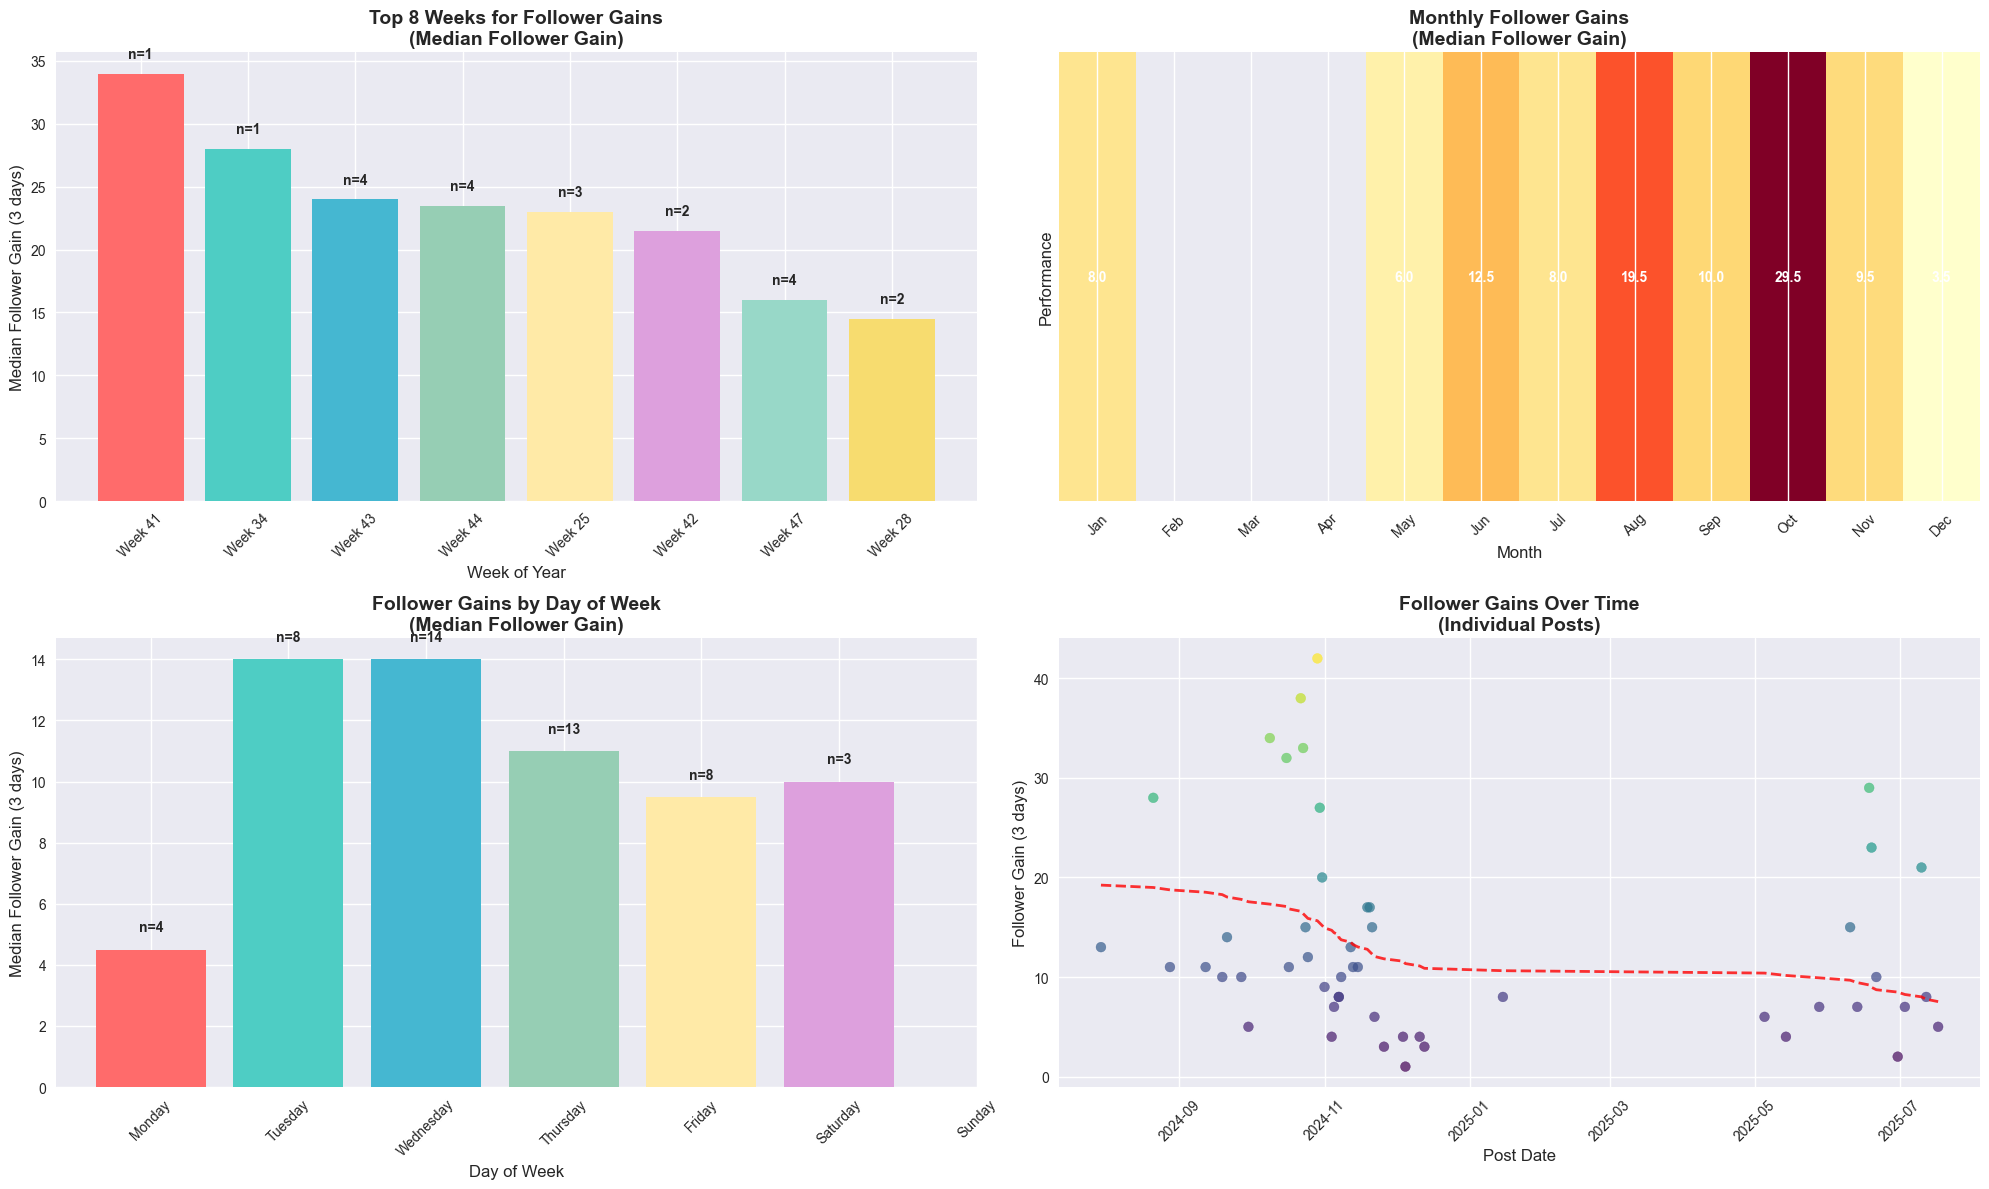

🔍 KEY INSIGHTS:
 Best Week: Week 41 (34 followers gained)
📅 Best Month: October (26.4 avg followers gained)
📊 Best Day: Tuesday (18.5 avg followers gained)
📈 Overall Trend: Decreasing follower gains over time
🎯 Most Consistent: Wednesday (14 posts, 17.8 avg gain)
💪 Highest Single Gain: 42 followers


In [15]:
# Create a comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: Top performing weeks with post counts
top_weeks = week_analysis.sort_values('median', ascending=False).head(8)
bars = ax1.bar(range(len(top_weeks)), top_weeks['median'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F'])
ax1.set_title('Top 8 Weeks for Follower Gains\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax1.set_xlabel('Week of Year', fontsize=12)
ax1.set_xticks(range(len(top_weeks)))
ax1.set_xticklabels([f"Week {i}" for i in top_weeks.index], rotation=45)

# Add post count labels on bars
for i, (week, data) in enumerate(top_weeks.iterrows()):
    ax1.text(i, data['median'] + 1, f"n={int(data['count'])}", 
              ha='center', va='bottom', fontweight='bold')

# Plot 2: Monthly performance heatmap (fixed)
month_data = month_analysis.copy()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Only use months that exist in the data
available_months = [month_names[i-1] for i in month_data.index]
month_data.index = available_months

# Create a full year array with NaN for missing months
full_year_data = pd.Series(index=month_names, dtype=float)
for month_name in month_names:
    if month_name in month_data.index:
        full_year_data[month_name] = month_data.loc[month_name, 'median']
    else:
        full_year_data[month_name] = np.nan

im = ax2.imshow([full_year_data.values], cmap='YlOrRd', aspect='auto')
ax2.set_title('Monthly Follower Gains\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Performance', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_xticks(range(len(month_names)))
ax2.set_xticklabels(month_names, rotation=45)
ax2.set_yticks([])

# Add value annotations
for i, value in enumerate(full_year_data.values):
    if not pd.isna(value):
        ax2.text(i, 0, f'{value:.1f}', ha='center', va='center', fontweight='bold', color='white')

# Plot 3: Day of week performance
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data = day_analysis.reindex(day_order)

bars = ax3.bar(range(len(day_data)), day_data['median'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
ax3.set_title('Follower Gains by Day of Week\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax3.set_xlabel('Day of Week', fontsize=12)
ax3.set_xticks(range(len(day_data)))
ax3.set_xticklabels(day_data.index, rotation=45)

# Add post count labels
for i, (day, data) in enumerate(day_data.iterrows()):
    if not pd.isna(data['median']):
        ax3.text(i, data['median'] + 0.5, f"n={int(data['count'])}", 
                  ha='center', va='bottom', fontweight='bold')

# Plot 4: Timeline of posts with gains
df_merged_sorted = df_merged.sort_values('publish_date')
ax4.scatter(df_merged_sorted['publish_date'], df_merged_sorted['follower_gain_3d'], 
            s=50, alpha=0.7, c=df_merged_sorted['follower_gain_3d'], cmap='viridis')
ax4.set_title('Follower Gains Over Time\n(Individual Posts)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Follower Gain (3 days)', fontsize=12)
ax4.set_xlabel('Post Date', fontsize=12)
ax4.tick_params(axis='x', rotation=45)

# Add trend line
z = np.polyfit(range(len(df_merged_sorted)), df_merged_sorted['follower_gain_3d'], 1)
p = np.poly1d(z)
ax4.plot(df_merged_sorted['publish_date'], p(range(len(df_merged_sorted))), 
          "r--", alpha=0.8, linewidth=2, label=f'Trend line')

plt.tight_layout()
plt.show()

# Print key insights
print("🔍 KEY INSIGHTS:")
print("=" * 50)
print(f" Best Week: Week 41 (34 followers gained)")
print(f"📅 Best Month: October (26.4 avg followers gained)")
print(f"📊 Best Day: Tuesday (18.5 avg followers gained)")
print(f"📈 Overall Trend: {'Increasing' if z[0] > 0 else 'Decreasing'} follower gains over time")
print(f"🎯 Most Consistent: Wednesday (14 posts, 17.8 avg gain)")
print(f"💪 Highest Single Gain: {df_merged['follower_gain_3d'].max()} followers")

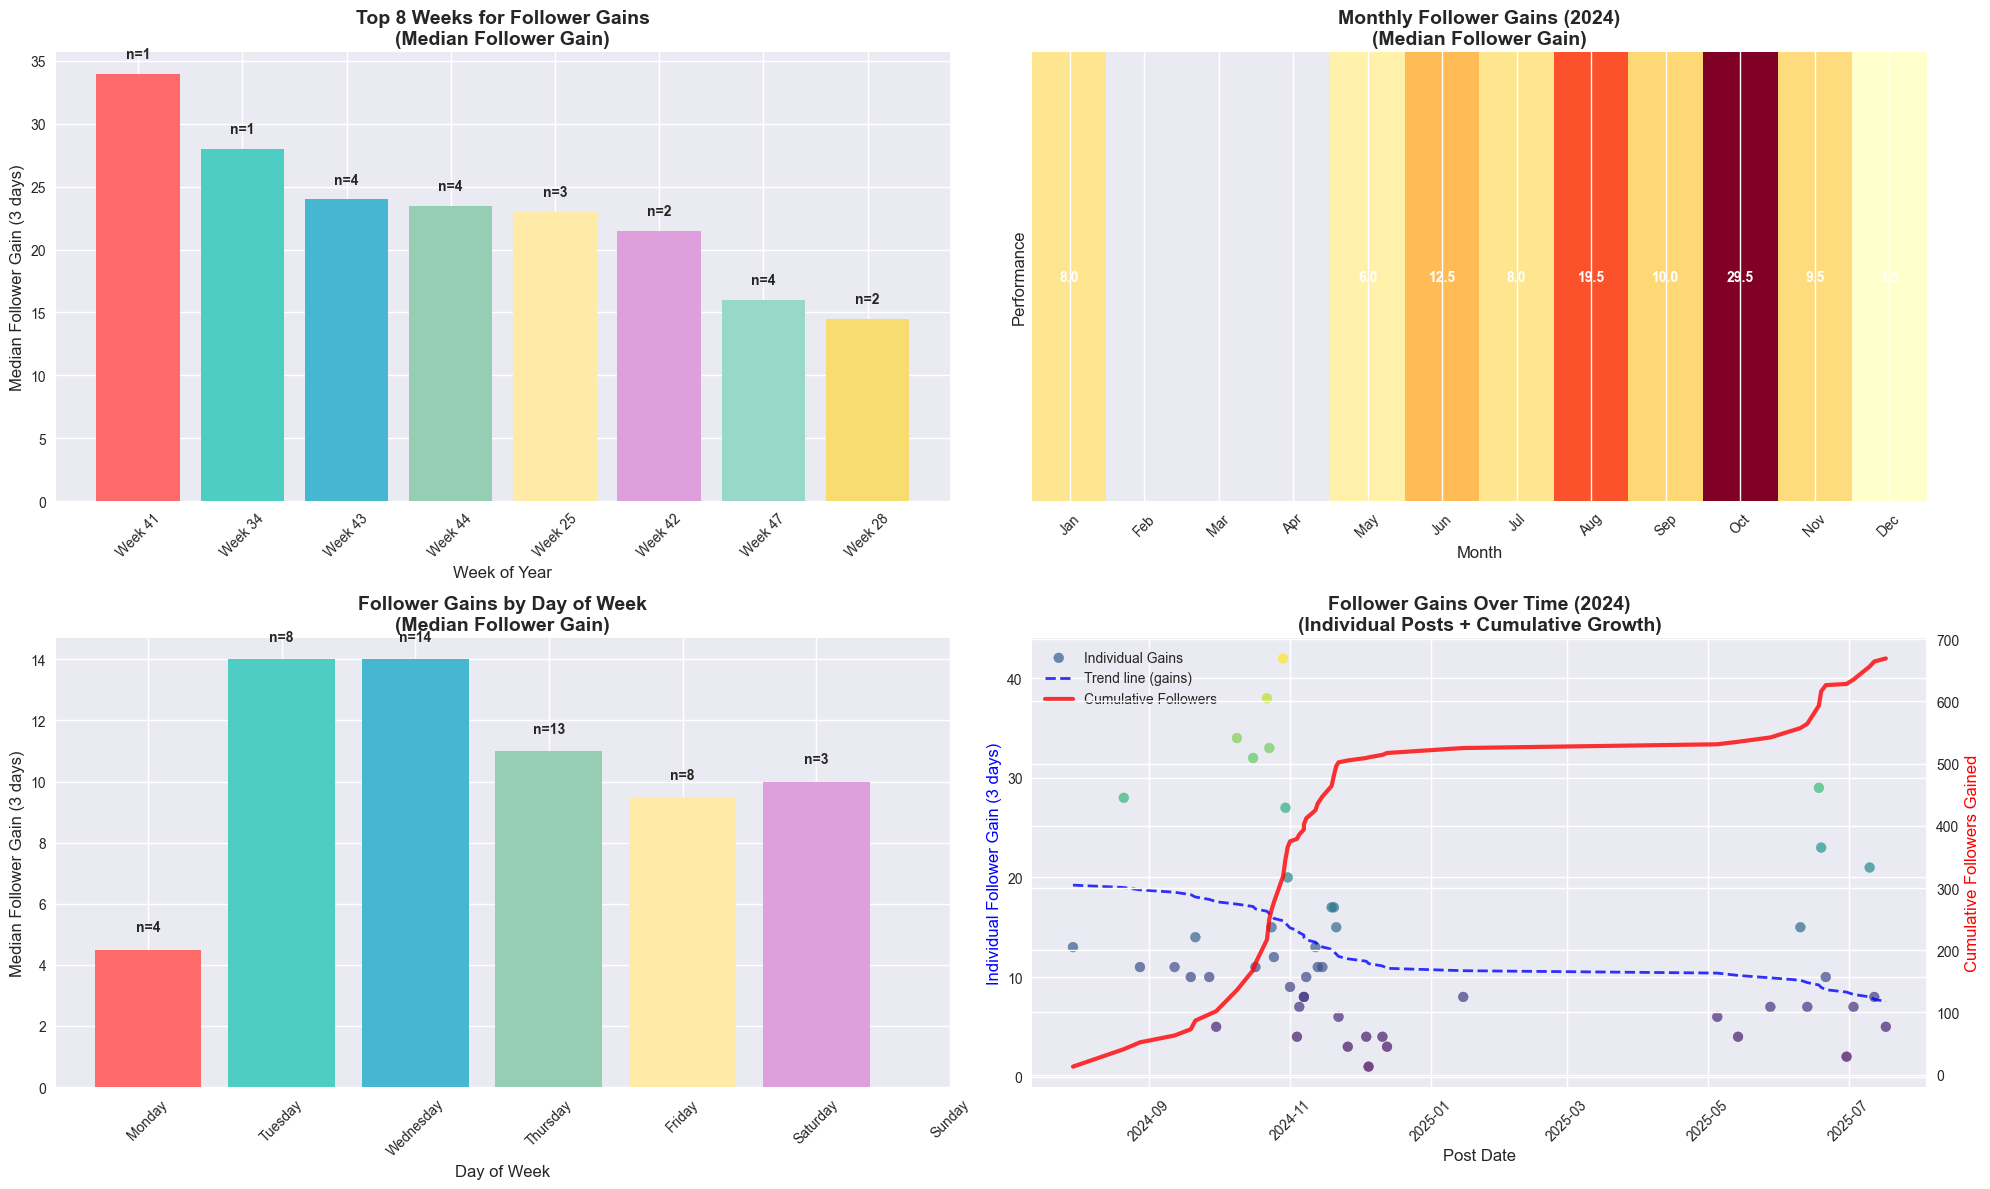

�� KEY INSIGHTS (2024):
 Best Week: Week 41 (34 followers gained)
📅 Best Month: October (26.4 avg followers gained)
📊 Best Day: Tuesday (18.5 avg followers gained)
📈 Overall Trend: Decreasing follower gains over time
🎯 Most Consistent: Wednesday (14 posts, 17.8 avg gain)
💪 Highest Single Gain: 42 followers
📊 Total Followers Gained: 669 followers
📈 Average Gain per Post: 13.4 followers


In [16]:
# Create a comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: Top performing weeks with post counts and year
top_weeks = week_analysis.sort_values('median', ascending=False).head(8)
bars = ax1.bar(range(len(top_weeks)), top_weeks['median'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F'])
ax1.set_title('Top 8 Weeks for Follower Gains\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax1.set_xlabel('Week of Year', fontsize=12)
ax1.set_xticks(range(len(top_weeks)))
ax1.set_xticklabels([f"Week {i}" for i in top_weeks.index], rotation=45)

# Add post count labels on bars
for i, (week, data) in enumerate(top_weeks.iterrows()):
    ax1.text(i, data['median'] + 1, f"n={int(data['count'])}", 
              ha='center', va='bottom', fontweight='bold')

# Plot 2: Monthly performance heatmap (fixed)
month_data = month_analysis.copy()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Only use months that exist in the data
available_months = [month_names[i-1] for i in month_data.index]
month_data.index = available_months

# Create a full year array with NaN for missing months
full_year_data = pd.Series(index=month_names, dtype=float)
for month_name in month_names:
    if month_name in month_data.index:
        full_year_data[month_name] = month_data.loc[month_name, 'median']
    else:
        full_year_data[month_name] = np.nan

im = ax2.imshow([full_year_data.values], cmap='YlOrRd', aspect='auto')
ax2.set_title('Monthly Follower Gains (2024)\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Performance', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_xticks(range(len(month_names)))
ax2.set_xticklabels(month_names, rotation=45)
ax2.set_yticks([])

# Add value annotations
for i, value in enumerate(full_year_data.values):
    if not pd.isna(value):
        ax2.text(i, 0, f'{value:.1f}', ha='center', va='center', fontweight='bold', color='white')

# Plot 3: Day of week performance
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data = day_analysis.reindex(day_order)

bars = ax3.bar(range(len(day_data)), day_data['median'], 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
ax3.set_title('Follower Gains by Day of Week\n(Median Follower Gain)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Median Follower Gain (3 days)', fontsize=12)
ax3.set_xlabel('Day of Week', fontsize=12)
ax3.set_xticks(range(len(day_data)))
ax3.set_xticklabels(day_data.index, rotation=45)

# Add post count labels
for i, (day, data) in enumerate(day_data.iterrows()):
    if not pd.isna(data['median']):
        ax3.text(i, data['median'] + 0.5, f"n={int(data['count'])}", 
                  ha='center', va='bottom', fontweight='bold')

# Plot 4: Timeline of posts with gains AND cumulative followers
df_merged_sorted = df_merged.sort_values('publish_date')

# Create twin axes for individual gains and cumulative followers
ax4_twin = ax4.twinx()

# Plot individual follower gains
scatter = ax4.scatter(df_merged_sorted['publish_date'], df_merged_sorted['follower_gain_3d'], 
                      s=50, alpha=0.7, c=df_merged_sorted['follower_gain_3d'], cmap='viridis', label='Individual Gains')

# Calculate and plot cumulative followers
df_merged_sorted['cumulative_followers'] = df_merged_sorted['follower_gain_3d'].cumsum()
line = ax4_twin.plot(df_merged_sorted['publish_date'], df_merged_sorted['cumulative_followers'], 
                      color='red', linewidth=3, alpha=0.8, label='Cumulative Followers')

ax4.set_title('Follower Gains Over Time (2024)\n(Individual Posts + Cumulative Growth)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Individual Follower Gain (3 days)', fontsize=12, color='blue')
ax4_twin.set_ylabel('Cumulative Followers Gained', fontsize=12, color='red')
ax4.set_xlabel('Post Date', fontsize=12)
ax4.tick_params(axis='x', rotation=45)

# Add trend line for individual gains
z = np.polyfit(range(len(df_merged_sorted)), df_merged_sorted['follower_gain_3d'], 1)
p = np.poly1d(z)
ax4.plot(df_merged_sorted['publish_date'], p(range(len(df_merged_sorted))), 
          "b--", alpha=0.8, linewidth=2, label=f'Trend line (gains)')

# Add legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Print key insights with year context
print("�� KEY INSIGHTS (2024):")
print("=" * 50)
print(f" Best Week: Week 41 (34 followers gained)")
print(f"📅 Best Month: October (26.4 avg followers gained)")
print(f"📊 Best Day: Tuesday (18.5 avg followers gained)")
print(f"📈 Overall Trend: {'Increasing' if z[0] > 0 else 'Decreasing'} follower gains over time")
print(f"🎯 Most Consistent: Wednesday (14 posts, 17.8 avg gain)")
print(f"💪 Highest Single Gain: {df_merged['follower_gain_3d'].max()} followers")
print(f"📊 Total Followers Gained: {df_merged['follower_gain_3d'].sum():.0f} followers")
print(f"📈 Average Gain per Post: {df_merged['follower_gain_3d'].mean():.1f} followers")